# Essential Math for Machine Learning: Python Edition

Course source: [LinkedIn Learning](https://www.linkedin.com/learning/essential-math-for-machine-learning-python-edition)

## 1 Rate of Change
Functions are often visualized as a line on a graph, and this line shows how the value returned by the function changes based on changes in the input value.

### 1.1 Linear Rate of Change

For example, imagine a function that returns the number of meters travelled by a cyclist based on the number of seconds that the cyclist has been cycling.

Here is such a function:

\begin{equation}q(x) = 2x + 1\end{equation}

We can plot the output for this function for a period of 10 seconds like this:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def q(x):
    return 2*x + 1

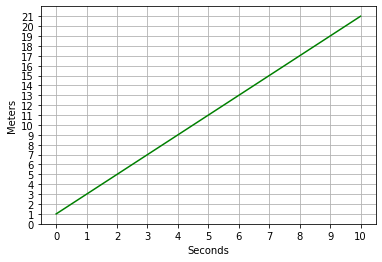

In [3]:
# Create an array of x values from 0 to 10
x = np.array(range(0, 11))

# Set up the graph
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.xticks(range(0,11, 1))
plt.yticks(range(0, 22, 1))
plt.grid()

# Plot x against q(x)
plt.plot(x,q(x), color='green')

plt.show()

It's clear from the graph that ***q*** is a *linear* function that describes a slope in which distance increases at a constant rate over time. In other words, the cyclist is travelling at a constant speed.

But what speed?

Speed, or more technically, velocity is a measure of change - it measures how the distance travelled changes over time (which is why we typically express it as a unit of distance per a unit of time, like *miles-per-hour* or *meters-per-second*). So we're looking for a way to measure the change in the line created by the function.

The change in values along the line define its *slope*, which we know from a previous lesson is represented like this:

\begin{equation}m = \frac{\Delta{y}}{\Delta{x}} \end{equation}

We can calculate the slope of our function like this:

\begin{equation}m = \frac{q(x)_{2} - q(x)_{1}}{x_{2} - x_{1}} \end{equation}

So we just need two ordered pairs of ***x*** and ***q(x)*** values from our line to apply this equation.

- After 1 second, ***x*** is 1 and ***q***(1) = **3**.
- After 10 seconds, ***x*** is 10 and ***q***(10) = 21.

So we can meassure the rate of change like this:

\begin{equation}m = \frac{21 - 3}{10 - 1} \end{equation}

This is the same as:

\begin{equation}m = \frac{18}{9} \end{equation}

Which simplifies to:

\begin{equation}m = \frac{2}{1} \end{equation}

So our rate of change is <sup>2</sup>/<sub>1</sub> or put another way, the cyclist is travelling at 2 meters-per-second.

### 1.2 Average Rate of Change
OK, let's look at another function that calculates distance travelled for a given number of seconds:

\begin{equation}r(x) = x^{2} + x\end{equation}

Let's take a look at that using Python:

In [4]:
def r(x):
    return x**2 + x

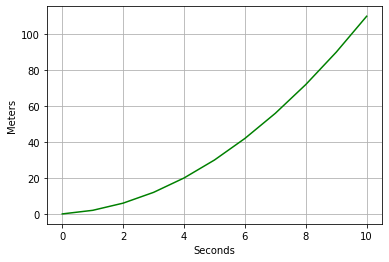

In [5]:
# Create an array of x values from 0 to 10
x = np.array(range(0, 11))

# Set up the graph
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.grid()

# Plot x against r(x)
plt.plot(x,r(x), color='green')

plt.show()

This time, the function is not linear. It's actually a quadratic function, and the line from 0 seconds to 10 seconds shows an exponential increase; in other words, the cyclist is *accelerating*.

Technically, acceleration itself is a measure of change in velocity over time; and velocity, as we've already discussed, is a measure of change in distance over time. So measuring accelleration is pretty complex, and requires *differential calculus*, which we're going to cover shortly. In fact, even just measuring the velocity at a single point in time requires differential calculus; but we can use algebraic methods to calculate an *average* rate of velocity for a given period shown in the graph.

First, we need to define a *secant* line that joins two points in our exponential arc to create a straight slope. For example, a secant line for the entire 10 second time span would join the following two points:

- 0, ***r***(0)
- 10, ***r***(10)

Run the following Python code to visualize this line:

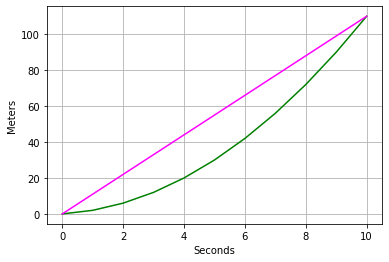

In [6]:
# Create an array for the secant line
s = np.array([0,10])

# Set up the graph
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.grid()

# Plot x against r(x)
plt.plot(x,r(x), color='green')

# Plot the secant line
plt.plot(s,r(s), color='magenta')
plt.show()

Now, because the secant line is straight, we can apply the slope formula we used for a linear function to calculate the average velocity for the 10 second period:

- At 0 seconds, ***x*** is 0 and ***r***(0) = **0**.
- At 10 seconds, ***x*** is 10 and ***r***(10) = 110.

So we can meassure the rate of change like this:

\begin{equation}m = \frac{110 - 0}{10 - 0} \end{equation}

This is the same as:

\begin{equation}m = \frac{110}{10} \end{equation}

Which simplifies to:

\begin{equation}m = \frac{11}{1} \end{equation}

So our rate of change is <sup>11</sup>/<sub>1</sub> or put another way, the cyclist is travelling at an average velocity of 11 meters-per-second over the 10-second period.

Of course, we can measure the average velocity between any two points on the exponential line. Use the following Python code to show the secant line for the period between 2 and 7 seconds, and calculate the average velocity for that period

In [7]:
def r(x):
    return x**2 + x

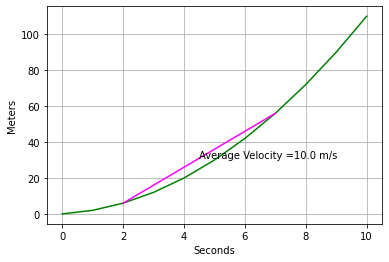

In [8]:
# Create an array for the secant line
s = np.array([2,7])

# Calculate rate of change
x1 = s[0]
x2 = s[-1]
y1 = r(x1)
y2 = r(x2)
a = (y2 - y1)/(x2 - x1)


# Set up the graph
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.grid()

# Plot x against r(x)
plt.plot(x,r(x), color='green')

# Plot the secant line
plt.plot(s,r(s), color='magenta')

plt.annotate('Average Velocity =' + str(a) + ' m/s',((x2+x1)/2, (y2+y1)/2))

plt.show()

## 2 Limits
You can use algebraeic methods to calculate the rate of change over a function interval by joining two points on the function with a secant line and measuring its slope. For example, a function might return the distance travelled by a cyclist in a period of time, and you can use a secant line to measure the average velocity between two points in time. However, this doesn't tell you the cyclist's vecolcity at any single point in time - just the average speed over an interval.

To find the cyclist's velocity at a specific point in time, you need the ability to find the slope of a curve at a given point. *Differential Calculus* enables us to do through the use of *derivatives*. We can use derivatives to find the slope at a specific *x* value by calculating a delta for *x<sub>1</sub>* and *x<sub>2</sub>* values that are infinitesimally close together - so you can think of it as measuring the slope of a tiny straight line that comprises part of the curve.

### 2.1 Introduction to Limits
However, before we can jump straight into derivatives, we need to examine another aspect of differential calculus - the *limit* of a function; which helps us measure how a function's value changes as the *x<sub>2</sub>* value approaches *x<sub>1</sub>*

To better understand limits, let's take a closer look at our function, and note that although we graph the function as a line, it is in fact made up of individual points. Run the following cell to show the points that we've plotted for integer values of ***x*** - the line is created by interpolating the points in between:

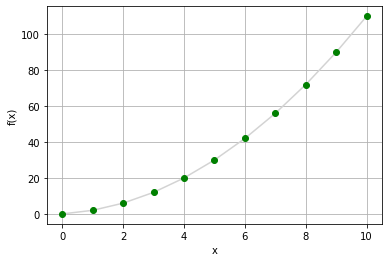

In [9]:
# Get the corresponding y values from the function
y = [r(i) for i in x] 

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='lightgrey', marker='o', markeredgecolor='green', markerfacecolor='green')

plt.show()

We know from the function that the ***r(x)*** values are calculated by squaring the ***x*** value and adding ***x***, so we can easily calculate points in between and show them - run the following code to see this:

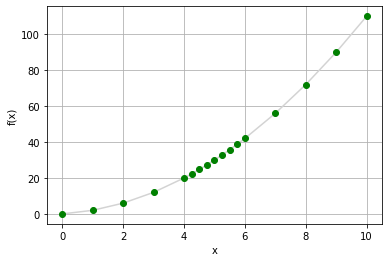

In [10]:
# Create an array of x values from 0 to 10 to plot
x = list(range(0,5))
x.append(4.25)
x.append(4.5)
x.append(4.75)
x.append(5)
x.append(5.25)
x.append(5.5)
x.append(5.75)
x = x + list(range(6,11))

# Get the corresponding y values from the function
y = [r(i) for i in x] 

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='lightgrey', marker='o', markeredgecolor='green', markerfacecolor='green')

plt.show()

Now we can see more clearly that this function line is formed of a continuous series of points, so theoretically for any given value of ***x*** there is a point on the line, and there is an adjacent point on either side with a value that is as close to ***x*** as possible, but not actually ***x***.

Run the following code to visualize a specific point for *x = 5*, and try to identify the closest point either side of it:

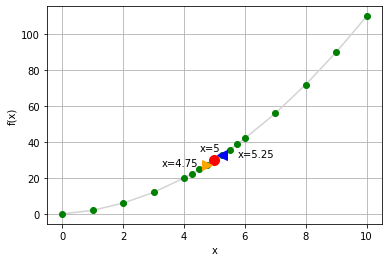

In [11]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='lightgrey', marker='o', markeredgecolor='green', markerfacecolor='green')

zx = 5
zy = r(zx)
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate('x=' + str(zx),(zx, zy), xytext=(zx - 0.5, zy + 5))

# Plot f(x) when x = 5.1
posx = 5.25
posy = r(posx)
plt.plot(posx, posy, color='blue', marker='<', markersize=10)
plt.annotate('x=' + str(posx),(posx, posy), xytext=(posx + 0.5, posy - 1))

# Plot f(x) when x = 4.9
negx = 4.75
negy = r(negx)
plt.plot(negx, negy, color='orange', marker='>', markersize=10)
plt.annotate('x=' + str(negx),(negx, negy), xytext=(negx - 1.5, negy - 1))

plt.show()

You can see the point where ***x*** is 5, and you can see that there are points shown on the graph that appear to be right next to this point (at *x=4.75* and *x=5.25*). However, if we zoomed in we'd see that there are still gaps that could be filled by other values of ***x*** that are even closer to 5; for example, 4.9 and 5.1, or 4.999 and 5.001. If we could zoom infinitely close to the line we'd see that no matter how close a value you use (for example, 4.999999999999), there is always a value that's fractionally closer (for example, 4.9999999999999).

So what we can say is that there is a hypothetical number that's as close as possible to our desired value of *x* without actually being *x*, but we can't express it as a real number. Instead, we express its symbolically as a *limit*, like this:

\begin{equation}\lim_{x \to 5} r(x)\end{equation}

This is interpreted as *the limit of function r(x) as *x* approaches 5*.

### 2.2 Limits and Continuity
The function ***r(x)*** is *continuous* for all real numbered values of ***x***. Put simply, this means that you can draw the line created by the function without lifting your pen (we'll look at a more formal definition later in this course).

However, this isn't necessarily true of all functions. Consider function ***g(x)*** below: 

\begin{equation}g(x) = -(\frac{12}{2x})^{2}\end{equation}

This function is a little more complex than the previous one, but the key thing to note is that it requires a division by *2x*. Now, ask yourself; what would happen if you applied this function to an *x* value of **0**?

Well, 2 &bull; 2 is 0, and anything divided by 0 is *undefined*. So the *domain* of this function does not include 0; in other words, the function is defined when *x* is any real number such that *x is not equal to 0*. The function should therefore be written like this:

\begin{equation}g(x) = -(\frac{12}{2x})^{2},\;\; x \ne 0\end{equation}

So why is this important? Let's investigate by running the following Python code to define the function and plot it for a set of arbitrary of values:

In [12]:
# Define function g
def g(x):
    if x != 0:
        return -(12/(2*x))**2

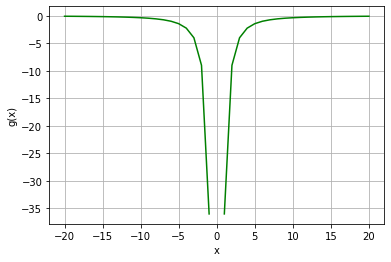

In [13]:

# Create an array of x values
x = range(-20, 21)

# Get the corresponding y values from the function
y = [g(a) for a in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='green')

plt.show()

Look closely at the plot, and note the gap the line where *x* = 0. This indicates that the function is not defined here.The *domain* of the function (it's set of possible input values) not include 0, and it's *range* (the set of possible output values) does not include a value for x=0.

This is a *non-continuous* function - in other words, it includes at least one gap when plotted (so you couldn't plot it by hand without lifting your pen). Specifically, the function is non-continuous at x=0.

By convention, when a non-continuous function is plotted, the points that form a continuous line (or *interval*) are shown as a line, and the end of each line where there is a discontinuity is shown as a circle, which is filled if the value at that point is included in the line and empty if the value is not included in the line.

In this case, the function produces two intervals with a gap between them where the function is not defined, so we can show the discontinuous point as an unfilled circle - run the following code to visualize this with Python:

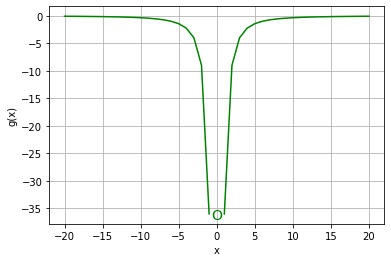

In [14]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='green')

# plot a circle at the gap (or close enough anyway!)
xy = (0,g(1))
plt.annotate('O',xy, xytext=(-0.7, -37),fontsize=14,color='green')

plt.show()

There are a number of reasons a function might be non-continuous. For example, consider the following function:

\begin{equation}h(x) = 2\sqrt{x},\;\; x \ge 0\end{equation}

Applying this function to a non-negative ***x*** value returns a valid output; but for any value where ***x*** is negative, the output is undefined, because the square root of a negative value is not a real number.

Here's the Python to plot function ***h***:

In [15]:
def h(x):
    if x >= 0:
        import numpy as np
        return 2 * np.sqrt(x)


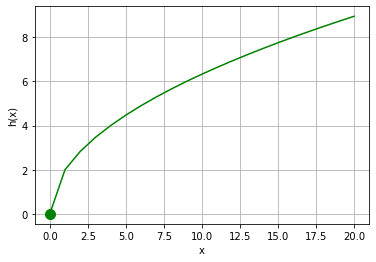

In [16]:
# Create an array of x values
x = range(-20, 21)

# Get the corresponding y values from the function
y = [h(a) for a in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

# Plot x against h(x)
plt.plot(x,y, color='green')

# plot a circle close enough to the h(-x) limit for our purposes!
plt.plot(0, h(0), color='green', marker='o', markerfacecolor='green', markersize=10)

plt.show()

Now, suppose we have a function like this:

\begin{equation}
k(x) = \begin{cases}
  x + 20, & \text{if } x \le 0, \\
  x - 100, & \text{otherwise }
\end{cases}
\end{equation}

In this case, the function's domain includes all real numbers, but its output is still non-continuous because of the way different values are returned depending on the value of *x*. The *range* of possible outputs for *k(x &le; 0)* is &le; 20, and the range of output values for *k(x > 0)* is x > -100.

Let's use Python to plot function ***k***:

In [17]:
def k(x):
    import numpy as np
    if x <= 0:
        return x + 20
    else:
        return x - 100

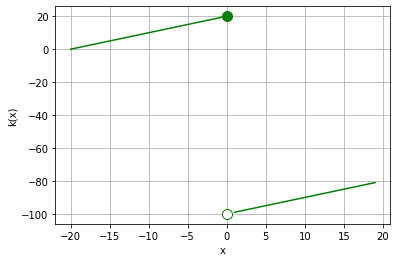

In [18]:
# Create an array of x values for each non-contonuous interval
x1 = range(-20, 1)
x2 = range(1, 20)

# Get the corresponding y values from the function
y1 = [k(i) for i in x1]
y2 = [k(i) for i in x2]

# Set up the graph
plt.xlabel('x')
plt.ylabel('k(x)')
plt.grid()

# Plot x against k(x)
plt.plot(x1,y1, color='green')
plt.plot(x2,y2, color='green')

# plot a circle at the interval ends
plt.plot(0, k(0), color='green', marker='o', markerfacecolor='green', markersize=10)
plt.plot(0, k(0.0001), color='green', marker='o', markerfacecolor='w', markersize=10)

plt.show()

### 2.3 Finding Limits of Functions Graphically
So the question arises, how do we find a value for the limit of a function at a specific point?

Let's explore this function, ***a***:

\begin{equation}a(x) = x^{2} + 1\end{equation}

We can start by plotting it:

In [19]:
# Define function a
def a(x):
    return x**2 + 1

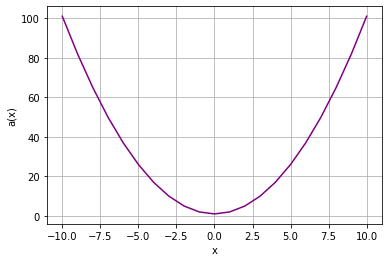

In [20]:
# Create an array of x values
x = range(-10, 11)

# Get the corresponding y values from the function
y = [a(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('a(x)')
plt.grid()

# Plot x against a(x)
plt.plot(x,y, color='purple')

plt.show()

Note that this function is continuous at all points, there are no gaps in its range. However, the range of the function is *{a(x) &ge; 1}* (in other words, all real numbers that are greater than or equal to 1). For negative values of ***x***, the function appears to return ever-decreasing values as ***x*** gets closer to 0, and for positive values of ***x***, the function appears to return ever-increasing values as ***x*** gets further from 0; but it never returns 0.

Let's plot the function for an ***x*** value of 0 and find out what the ***a(0)*** value is returned:

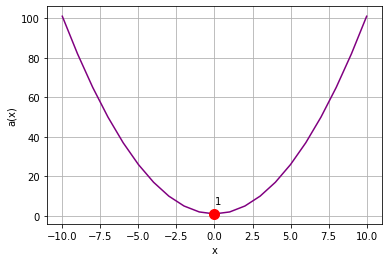

In [21]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('a(x)')
plt.grid()

# Plot x against a(x)
plt.plot(x,y, color='purple')

# Plot a(x) when x = 0
zx = 0
zy = a(zx)
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate(str(zy),(zx, zy), xytext=(zx, zy + 5))

plt.show()

OK, so ***a(0)*** returns **1**.

What happens if we use ***x*** values that are very slightly higher or lower than 0?

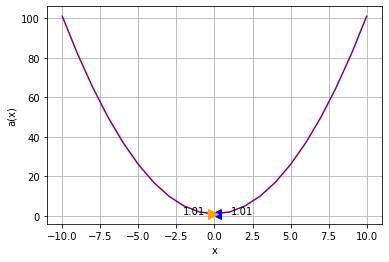

In [22]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('a(x)')
plt.grid()

# Plot x against a(x)
plt.plot(x,y, color='purple')

# Plot a(x) when x = 0.1
posx = 0.1
posy = a(posx)
plt.plot(posx, posy, color='blue', marker='<', markersize=10)
plt.annotate(str(posy),(posx, posy), xytext=(posx + 1, posy))

# Plot a(x) when x = -0.1
negx = -0.1
negy = a(negx)
plt.plot(negx, negy, color='orange', marker='>', markersize=10)
plt.annotate(str(negy),(negx, negy), xytext=(negx - 2, negy))

plt.show()

These ***x*** values return ***a(x)*** values that are just slightly above 1, and if we were to keep plotting numbers that are increasingly close to 0, for example 0.0000000001 or -0.0000000001, the function would still return a value that is just slightly greater than 1. The limit of function *a(x)* as *x* approaches 0, is 1; and the notation to indicate this is:

\begin{equation}\lim_{x \to 0} a(x) = 1 \end{equation}

This reflects a more formal definition of function continuity. Previously, we stated that a function is continuous at a point if you can draw it at that point without lifting your pen. The more mathematical definition is that a function is continuous at a point if the limit of the function as it approaches that point from both directions is equal to the function's value at that point. In this case, as we approach x = 0 from both sides, the limit is 1; and the value of *a(0)* is also 1; so the function is continuous at x = 0.

#### 2.3.1 Limits at Non-Continuous Points
Let's try another function, which we'll call ***b***:

\begin{equation}b(x) = -2x^{2} \cdot \frac{1}{x},\;\;x\ne0\end{equation}

Note that this function has a domain that includes all real number values of *x* such that *x* does not equal 0. In other words, the function will return a valid output for any number other than 0.

Let's create it and plot it with Python:

In [23]:
# Define function b
def b(x):
    if x != 0:
        return (-2*x**2) * 1/x

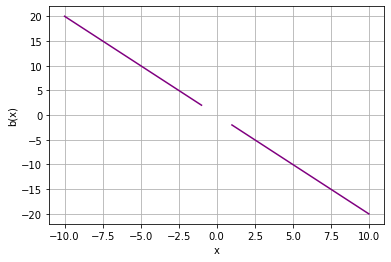

In [24]:
# Create an array of x values
x = range(-10, 11)

# Get the corresponding y values from the function
y = [b(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('b(x)')
plt.grid()

# Plot x against b(x)
plt.plot(x,y, color='purple')

plt.show()

The output from this function contains a gap in the line where x = 0. It seems that not only does the *domain* of the function (the values that can be passed in as *x*) exclude 0; but the *range* of the function (the set of values that can be returned from it) also excludes 0.

We can't evaluate the function for an *x* value of 0, but we can see what it returns for a value that is just very slightly less than 0:

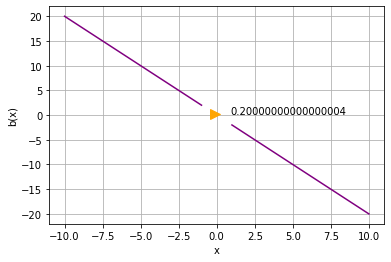

In [25]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('b(x)')
plt.grid()

# Plot x against b(x)
plt.plot(x,y, color='purple')

# Plot b(x) for x = -0.1
negx = -0.1
negy = b(negx)
plt.plot(negx, negy, color='orange', marker='>', markersize=10)
plt.annotate(str(negy),(negx, negy), xytext=(negx + 1, negy))

plt.show()

We can even try a negative *x* value that's a little closer to 0.

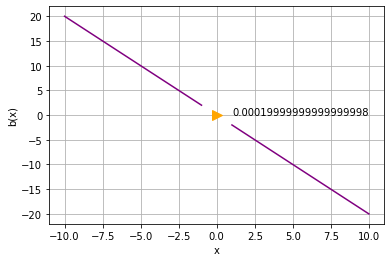

In [26]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('b(x)')
plt.grid()

# Plot x against b(x)
plt.plot(x,y, color='purple')

# Plot b(x) for x = -0.0001
negx = -0.0001
negy = b(negx)
plt.plot(negx, negy, color='orange', marker='>', markersize=10)
plt.annotate(str(negy),(negx, negy), xytext=(negx + 1, negy))

plt.show()

So as the value of *x* gets closer to 0 from the left (negative), the value of *b(x)* is decreasing towards 0. We can show this with the following notation:

\begin{equation}\lim_{x \to 0^{-}} b(x) = 0 \end{equation}

Note that the arrow points to 0<sup>-</sup> (with a minus sign) to indicate that we're describing the limit as we approach 0 from the negative side.

So what about the positive side?

Let's see what the function value is when *x* is 0.1:

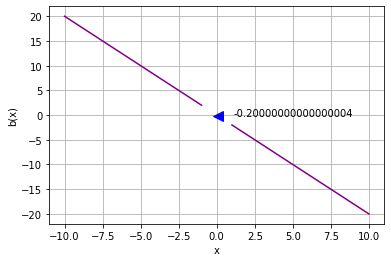

In [27]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('b(x)')
plt.grid()

# Plot x against b(x)
plt.plot(x,y, color='purple')

# Plot b(x) for x = 0.1
posx = 0.1
posy = b(posx)
plt.plot(posx, posy, color='blue', marker='<', markersize=10)
plt.annotate(str(posy),(posx, posy), xytext=(posx + 1, posy))

plt.show()

What happens if we decrease the value of *x* so that it's even closer to 0?

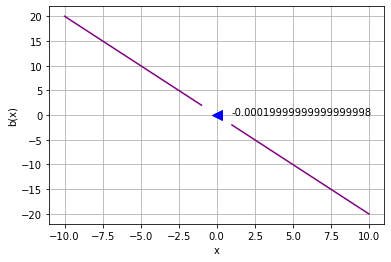

In [28]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('b(x)')
plt.grid()

# Plot x against b(x)
plt.plot(x,y, color='purple')

# Plot b(x) for x = 0.0001
posx = 0.0001
posy = b(posx)
plt.plot(posx, posy, color='blue', marker='<', markersize=10)
plt.annotate(str(posy),(posx, posy), xytext=(posx + 1, posy))

plt.show()

As with the negative side, as *x* approaches 0 from the positive side, the value of *b(x)* gets closer to 0; and we can show that like this:

\begin{equation}\lim_{x \to 0^{+}} b(x) = 0 \end{equation}

Now, even although the function is not defined at x = 0; since the limit as we approach x = 0 from the negative side is 0, and the limit when we approach x = 0 from the positive side is also 0; we can say that the overall, or *two-sided* limit for the function at x = 0 is 0:

\begin{equation}\lim_{x \to 0} b(x) = 0 \end{equation}

So can we therefore just ignore the gap and say that the function is *continuous* at x = 0? Well, recall that the formal definition for continuity is that to be continuous at a point, the function's limit as we approach the point in both directions must be equal to the function's value at that point. In this case, the two-sided limit as we approach x = 0 is 0, but *b(0)* is not defined; so the function is ***non-continuous*** at x = 0.

#### 2.3.2 One-Sided Limits
Let's take a look at a different function. We'll call this one ***c***:

\begin{equation}
c(x) = \begin{cases}
  x + 20, & \text{if } x \le 0, \\
  x - 100, & \text{otherwise }
\end{cases}
\end{equation}

In this case, the function's domain includes all real numbers, but its range is still non-continuous because of the way different values are returned depending on the value of *x*. The range of possible outputs for *c(x &le; 0)* is &le; 20, and the range of output values for *c(x > 0)* is x &ge; -100.

Let's use Python to plot function ***c*** with some values for *c(x)* marked on the line

In [29]:
def c(x):
    import numpy as np
    if x <= 0:
        return x + 20
    else:
        return x - 100

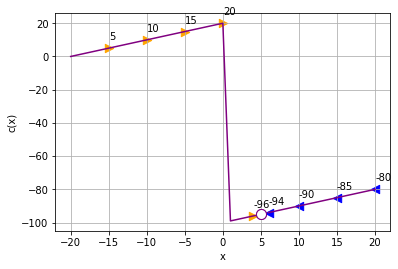

In [30]:
# Plot output from function h
from matplotlib import pyplot as plt

# Create arrays of x values
x1 = range(-20, 6)
x2 = range(6, 21)

# Get the corresponding y values from the function
y1 = [c(i) for i in x1]
y2 = [c(i) for i in x2]

# Set up the graph
plt.xlabel('x')
plt.ylabel('c(x)')
plt.grid()

# Plot x against c(x)
plt.plot(x1,y1, color='purple')
plt.plot(x2,y2, color='purple')

# plot a circle close enough to the c limits for our purposes!
plt.plot(5, c(5), color='purple', marker='o', markerfacecolor='purple', markersize=10)
plt.plot(5, c(5.001), color='purple', marker='o', markerfacecolor='w', markersize=10)

# plot some points from the +ve direction
posx = [20, 15, 10, 6]
posy = [c(i) for i in posx]
plt.scatter(posx, posy, color='blue', marker='<', s=70)
for p in posx:
    plt.annotate(str(c(p)),(p, c(p)),xytext=(p, c(p) + 5))
    
# plot some points from the -ve direction
negx = [-15, -10, -5, 0, 4]
negy = [c(i) for i in negx]
plt.scatter(negx, negy, color='orange', marker='>', s=70)
for n in negx:
    plt.annotate(str(c(n)),(n, c(n)),xytext=(n, c(n) + 5))

plt.show()

The plot of the function shows a line in which the *c(x)* value increases towards 25 as *x* approaches 5 from the negative side:

\begin{equation}\lim_{x \to 5^{-}} c(x) = 25 \end{equation}

However, the *c(x)* value decreases towards -95 as *x* approaches 5 from the positive side:

\begin{equation}\lim_{x \to 5^{+}} c(x) = -95 \end{equation}

So what can we say about the two-sided limit of this function at x = 5?

The limit as we approach x = 5 from the negative side is *not* equal to the limit as we approach x = 5 from the positive side, so no two-sided limit exists for this function at that point:

\begin{equation}\lim_{x \to 5} \text{does not exist} \end{equation}

#### 2.3.3 Asymptotes and Infinity
OK, time to look at another function:

\begin{equation}d(x) = \frac{4}{x - 25},\;\; x \ne 25\end{equation}

In [31]:
# Define function d
def d(x):
    if x != 25:
        return 4 / (x - 25)

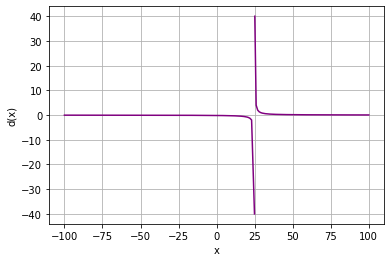

In [32]:
# Create an array of x values
x = list(range(-100, 24))
x.append(24.9) # Add some fractional x
x.append(25)   # values around
x.append(25.1) # 25 for finer-grain results
x = x + list(range(26, 101))
# Get the corresponding y values from the function
y = [d(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('d(x)')
plt.grid()

# Plot x against d(x)
plt.plot(x,y, color='purple')

plt.show()

What's the limit of *d* as *x* approaches 25?

We can plot a few points to help us:

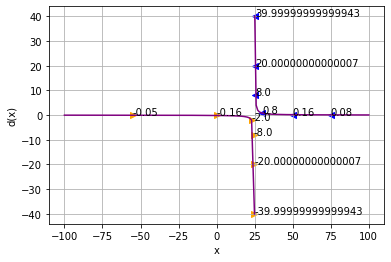

In [33]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('d(x)')
plt.grid()

# Plot x against d(x)
plt.plot(x,y, color='purple')

# plot some points from the +ve direction
posx = [75, 50, 30, 25.5, 25.2, 25.1]
posy = [d(i) for i in posx]
plt.scatter(posx, posy, color='blue', marker='<')
for p in posx:
    plt.annotate(str(d(p)),(p, d(p)))
    
# plot some points from the -ve direction
negx = [-55, 0, 23, 24.5, 24.8, 24.9]
negy = [d(i) for i in negx]
plt.scatter(negx, negy, color='orange', marker='>')
for n in negx:
    plt.annotate(str(d(n)),(n, d(n)))

plt.show()

From these plotted values, we can see that as *x* approaches 25 from the negative side, *d(x)* is decreasing, and as *x* approaches 25 from the positive side, *d(x)* is increasing. As *x* gets closer to 25, *d(x)* increases or decreases more significantly.

If we were to plot every fractional value of *d(x)* for *x* values between 24.9 and 25, we'd see a line that decreases indefintely, getting closer and closer to the x = 25 vertical line, but never actually reaching it. Similarly, plotting every *x* value between 25 and 25.1 would result in a line going up indefinitely, but always staying to the right of the vertical x = 25 line.

The x = 25 line in this case is an *asymptote* - a line to which a curve moves ever closer but never actually reaches. The positive limit for x = 25 in this case in not a real numbered value, but *infinity*:

\begin{equation}\lim_{x \to 25^{+}} d(x) = \infty \end{equation}

Conversely, the negative limit for x = 25 is negative infinity:

\begin{equation}\lim_{x \to 25^{-}} d(x) = -\infty \end{equation}



### 2.4 Finding Limits Numerically Using a Table
Up to now, we've estimated limits for a point graphically by examining a graph of a function. You can also approximate limits by creating a table of x values and the corresponding function values either side of the point for which you want to find the limits.

For example, let's return to our ***a*** function:

\begin{equation}a(x) = x^{2} + 1\end{equation}

If we want to find the limits as x is approaching 0, we can apply the function to some values either side of 0 and view them as a table. Here's some Python code to do that:

In [34]:
# Define function a
def a(x):
    return x**2 + 1

In [35]:
# Create a dataframe with an x column containing values either side of 0
df = pd.DataFrame ({'x': [-1, -0.5, -0.2, -0.1, -0.01, 0, 0.01, 0.1, 0.2, 0.5, 1]})

# Add an a(x) column by applying the function to x
df['a(x)'] = a(df['x'])

#Display the dataframe
df

,x,a(x)
0,-1.00,2.0000
1,-0.50,1.2500
2,-0.20,1.0400
3,-0.10,1.0100
4,-0.01,1.0001
5,0.00,1.0000
6,0.01,1.0001
7,0.10,1.0100
8,0.20,1.0400
9,0.50,1.2500


Looking at the output, you can see that the function values are getting closer to 1 as x approaches 0 from both sides, so:

\begin{equation}\lim_{x \to 0} a(x) = 1 \end{equation}

Additionally, you can see that the actual value of the function when x = 0 is also 1, so:

\begin{equation}\lim_{x \to 0} a(x) = a(0) \end{equation}

Which according to our earlier definition, means that the function is continuous at 0.

However, you should be careful not to assume that the limit when x is approaching 0 will always be the same as the value when x = 0; even when the function is defined for x = 0.

For example, consider the following function:

\begin{equation}
e(x) = \begin{cases}
  5, & \text{if } x = 0, \\
  1 + x^{2}, & \text{otherwise }
\end{cases}
\end{equation}

Let's see what the function returns for *x* values either side of 0 in a table:

In [36]:
# Define function e
def e(x):
    if x == 0:
        return 5
    else:
        return 1 + x**2


In [37]:
# Create a dataframe with an x column containing values either side of 0
x= [-1, -0.5, -0.2, -0.1, -0.01, 0, 0.01, 0.1, 0.2, 0.5, 1]
y =[e(i) for i in x]
df = pd.DataFrame ({' x':x, 'e(x)': y })
df

,x,e(x)
0,-1.00,2.0000
1,-0.50,1.2500
2,-0.20,1.0400
3,-0.10,1.0100
4,-0.01,1.0001
5,0.00,5.0000
6,0.01,1.0001
7,0.10,1.0100
8,0.20,1.0400
9,0.50,1.2500


As before, you can see that as the *x* values approach 0 from both sides, the value of the function gets closer to 1, so:

\begin{equation}\lim_{x \to 0} e(x) = 1 \end{equation}

However the actual value of the function when x = 0 is 5, not 1; so:

\begin{equation}\lim_{x \to 0} e(x) \ne e(0) \end{equation}

Which according to our earlier definition, means that the function is non-continuous at 0.

Run the following cell to see what this looks like as a graph:

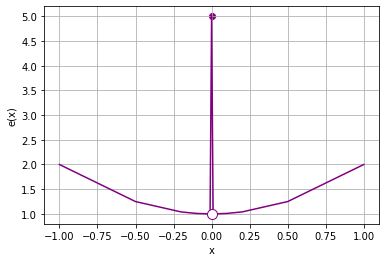

In [38]:
# Set up the graph
plt.xlabel('x')
plt.ylabel('e(x)')
plt.grid()

# Plot x against e(x)
plt.plot(x, y, color='purple')
# (we're cheating slightly - we'll manually plot the discontinous point...)
plt.scatter(0, e(0), color='purple')
# (... and overplot the gap)
plt.plot(0, 1, color='purple', marker='o', markerfacecolor='w', markersize=10)
plt.show()

### 2.5 Determining Limits Analytically
We've seen how to estimate limits visually on a graph, and by creating a table of *x* and *f(x)* values either side of a point. There are also some mathematical techniques we can use to calculate limits.

#### 2.5.1 Direct Substitution
Recall that our definition for a function to be continuous at a point is that the two-directional limit must exist and that it must be equal to the function value at that point. It therefore follows, that if we know that a function is continuous at a given point, we can determine the limit simply by evaluating the function for that point.

For example, let's consider the following function ***g***:

\begin{equation}g(x) = \frac{x^{2} - 1}{x - 1}, x \ne 1\end{equation}

Run the following code to see this function as a graph:

In [39]:
# Define function f
def g(x):
    if x != 1:
        return (x**2 - 1) / (x - 1)

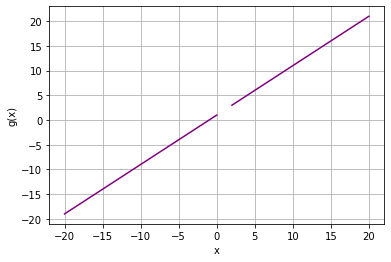

In [40]:
# Create an array of x values
x= range(-20, 21)
y =[g(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='purple')

plt.show()

Now, suppose we need to find the limit of ***g(x)*** as ***x*** approaches **4**. We can try to find this by simply substituting 4 for the *x* values in the function:

\begin{equation}g(4) = \frac{4^{2} - 1}{4 - 1}\end{equation}

This simplifies to:

\begin{equation}g(4) = \frac{15}{3}\end{equation}

So:

\begin{equation}\lim_{x \to 4} g(x) = 5\end{equation}

Let's take a look:

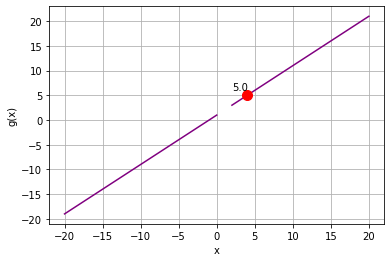

Limit as x -> 4 = 5.0


In [41]:
# Set the x point we're interested in
zx = 4

plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='purple')

# Plot g(x) when x = 0
zy = g(zx)
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate(str(zy),(zx, zy), xytext=(zx - 2, zy + 1))

plt.show()

print ('Limit as x -> ' + str(zx) + ' = ' + str(zy))

#### 2.5.2 Factorization
OK, now let's try to find the limit of ***g(x)*** as ***x*** approaches **1**.

We know from the function definition that the function is not defined at x = 1, but we're not trying to find the *value* of ***g(x)*** when x *equals* 1; we're trying to find the *limit* of ***g(x)*** as x *approaches* 1.

The direct substitution approach won't work in this case:

\begin{equation}g(1) = \frac{1^{2} - 1}{1 - 1}\end{equation}

Simplifies to:

\begin{equation}g(1) = \frac{0}{0}\end{equation}

Anything divided by 0 is undefined; so all we've done is to confirm that the function is not defined at this point. You might be tempted to assume that this means the limit does not exist, but <sup>0</sup>/<sub>0</sub> is a special case; it's what's known as the *indeterminate form*; and there may be a way to solve this problem another way.

We can factor the *x<sup>2</sup> - 1* numerator in the definition of ***g*** as as *(x - 1)(x + 1)*, so the limit equation can we rewritten like this:

\begin{equation}\lim_{x \to a} g(x) = \frac{(x-1)(x+1)}{x - 1}\end{equation}

The ***x - 1*** in the numerator and the ***x - 1*** in the denominator cancel each other out:

\begin{equation}\lim_{x \to a} g(x)= x+1\end{equation}

So we can now use substitution for *x = 1* to calculate the limit as *1 + 1*:

\begin{equation}\lim_{x \to 1} g(x) = 2\end{equation}

Let's see what that looks like:

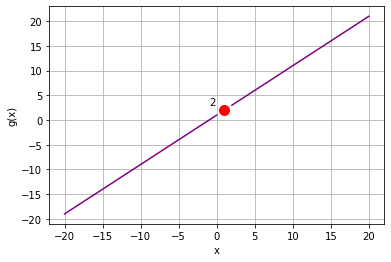

Limit as x -> 1 = 2


In [42]:
# Set the x point we're interested in
zx = 1

# Calculate the limit of g(x) when x->zx using the factored equation
zy = zx + 1

plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='purple')

# Plot the limit of g(x)
zy = zx + 1
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate(str(zy),(zx, zy), xytext=(zx - 2, zy + 1))

plt.show()

print ('Limit as x -> ' + str(zx) + ' = ' + str(zy))

#### 2.5.3 Rationalization
Let's look at another function:

\begin{equation}h(x) = \frac{\sqrt{x} - 2}{x - 4}, x \ne 4 \text{ and } x \ge 0\end{equation}

Run the following cell to plot this function as a graph:

In [43]:
# Define function h
def h(x):
    import math
    if x >= 0 and x != 4:
        return (math.sqrt(x) - 2) / (x - 4)

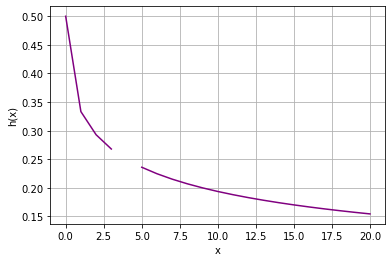

In [44]:
# Create an array of x values
x= range(-20, 21)
y =[h(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

# Plot x against h(x)
plt.plot(x,y, color='purple')

plt.show()

To find the limit of ***h(x)*** as ***x*** approaches **4**, we can't use the direct substitution method because the function is not defined at that point. However, we can take an alternative approach by multiplying both the numerator and denominator in the function by the *conjugate* of the numerator to *rationalize* the square root term (a conjugate is a binomial formed by reversing the sign of the second term of a binomial):

\begin{equation}\lim_{x \to a}h(x) = \frac{\sqrt{x} - 2}{x - 4}\cdot\frac{\sqrt{x} + 2}{\sqrt{x} + 2}\end{equation}

This simplifies to:

\begin{equation}\lim_{x \to a}h(x) = \frac{(\sqrt{x})^{2} - 2^{2}}{(x - 4)({\sqrt{x} + 2})}\end{equation}

The &radic;x<sup>2</sup> is x, and 2<sup>2</sup> is 4, so we can simplify the numerator as follows:

\begin{equation}\lim_{x \to a}h(x) = \frac{x - 4}{(x - 4)({\sqrt{x} + 2})}\end{equation}

Now we can cancel out the *x - 4* in both the numerator and denominator:

\begin{equation}\lim_{x \to a}h(x) = \frac{1}{{\sqrt{x} + 2}}\end{equation}

So for x approaching 4, this is:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{{\sqrt{4} + 2}}\end{equation}

This simplifies to:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{2 + 2}\end{equation}

Which is of course:

\begin{equation}\lim_{x \to 4}h(x) = \frac{1}{4}\end{equation}

So the limit of ***h(x)*** as ***x*** approaches **4** is <sup>1</sup>/<sub>4</sub> or 0.25.

Let's calculate and plot this with Python:

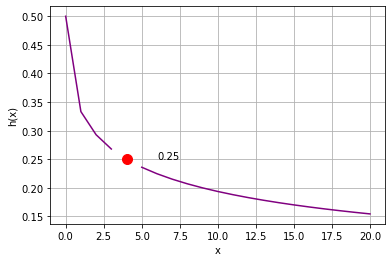

Limit as x -> 4 = 0.25


In [45]:
# Specify the point we're interested in
zx = 4

# Calculate the limit of f(x) when x->zx using factored equation
import math
zy = 1 / ((math.sqrt(zx)) + 2)

plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

# Plot x against h(x)
plt.plot(x,y, color='purple')

# Plot the limit of h(x) when x->zx                                    
plt.plot(zx, zy, color='red', marker='o', markersize=10)
plt.annotate(str(zy),(zx, zy), xytext=(zx + 2, zy))

plt.show()

print ('Limit as x -> ' + str(zx) + ' = ' + str(zy))

### 2.6 Rules for Limit Operations
When you are working with functions and limits, you may want to combine limits using arithmetic operations. There are some intuitive rules for doing this.

Let's define two simple functions, ***j***:

\begin{equation}j(x) = 2x - 2\end{equation}

and ***l***:

\begin{equation}l(x) = -2x + 4\end{equation}


Run the cell below to plot these functions:

In [46]:
# Define function j
def j(x):
    return x * 2 - 2

In [47]:
# Define function l
def l(x):
    return -x * 2 + 4

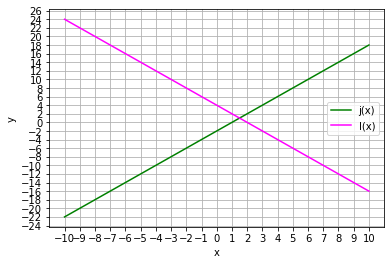

In [48]:
# Create an array of x values
x = range(-10, 11)

# Get the corresponding y values from the functions
jy = [j(i) for i in x]
ly = [l(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.xticks(range(-10,11, 1))
plt.ylabel('y')
plt.yticks(range(-30,30, 2))
plt.grid()

# Plot x against j(x)
plt.plot(x,jy, color='green', label='j(x)')

# Plot x against l(x)
plt.plot(x,ly, color='magenta', label='l(x)')

plt.legend()

plt.show()

#### 2.6.1 Addition of Limits

First, let's look at the rule for addition:

\begin{equation}\lim_{x \to a} (j(x) + l(x)) = \lim_{x \to a} j(x) + \lim_{x \to a} l(x)\end{equation}

What we're saying here, is that the limit of *j(x)* + *l(x)* as *x* approaches *a*, is the same as the limit of *j(x)* as *x* approaches *a* added to the limit of *l(x)* as *x* approaches *a*.

Looking at the graph for our functions ***j*** and ***l***, let's apply this rule to an *a* value of **8**.

By visually inspecting the graph, you can see that as *x* approaches 8 from either direction, *j(x)* gets closer to 14, so:

\begin{equation}\lim_{x \to 8} j(x) = 14\end{equation}

Similarly, as *x* approaches 8 from either direction, *l(x)* gets closer to -12, so:

\begin{equation}\lim_{x \to 8} l(x) = -12\end{equation}

So based on the addition rule:

\begin{equation}\lim_{x \to 8} (j(x) + l(x)) = 14 + -12 = 2\end{equation}

#### 2.6.2 Subtraction of Limits
Here's the rule for subtraction:

\begin{equation}\lim_{x \to a} (j(x) - l(x)) = \lim_{x \to a} j(x) - \lim_{x \to a} l(x)\end{equation}

As you've probably noticed, this is consistent with the rule of addition. Based on an *a* value of 8 (and the limits we identified for this *a* value above), we can apply this rule like this:

\begin{equation}\lim_{x \to 8} (j(x) - l(x)) = 14 - -12 = 26\end{equation}

#### 2.6.3 Multiplication of Limits
Here's the rule for multiplication:

\begin{equation}\lim_{x \to a} (j(x) \cdot l(x)) = \lim_{x \to a} j(x) \cdot \lim_{x \to a} l(x)\end{equation}

Again, you can apply this to the limits as x approached an *a* value of 8 we identified previously:

\begin{equation}\lim_{x \to 8} (j(x) \cdot l(x)) = 14 \cdot -12 = -168\end{equation}

This rule also applies to multipying a limit by a constant:

\begin{equation}\lim_{x \to a} c \cdot l(x) = c \cdot \lim_{x \to a} l(x)\end{equation}

So for an *a* value of 8 and a constant *c* value of 3, this equates to:

\begin{equation}\lim_{x \to 8} 3 \cdot l(x) = 3 \cdot -12 = -36\end{equation}


#### 2.6.4 Division of Limits
For division, assuming the limit of *l(x)* when x is approaching *a* is not 0:

\begin{equation}\lim_{x \to a} \frac{j(x)}{l(x)} = \frac{\lim_{x \to a} j(x)}{\lim_{x \to a} l(x)}\end{equation}

So, based on our limits for *j(x)* and *l(x*) when *x* approaches 8:

\begin{equation}\lim_{x \to 8} \frac{j(x)}{l(x)} = \frac{14}{-12}= \frac{7}{-6}\end{equation}

#### 2.6.5 Limit Exponentials and Roots

Assuming *n* is an integer:

\begin{equation}\lim_{x \to a} (j(x))^{n} = \Big(\lim_{x \to a} j(x)\Big)^{n}\end{equation}

So for example:

\begin{equation}\lim_{x \to 8} (j(x))^{2} = \Big(\lim_{x \to 8} j(x)\Big)^{2} = 14^{2} = 196\end{equation}

For roots, again assuming *n* is an integer:

\begin{equation}\lim_{x \to a} \sqrt[n]{j(x)} = \sqrt[n]{\lim_{x \to a} j(x)}\end{equation}

So:

\begin{equation}\lim_{x \to 8} \sqrt[2]{j(x)} = \sqrt[2]{\lim_{x \to 8} j(x)} = \sqrt[2]{14} \approx 3.74\end{equation}


## 3 Differentiation and Derivatives
So far in this course, you've learned how to evaluate limits for points on a line. Now you're going to build on that knowledge and look at a calculus technique called *differentiation*. In differentiation, we use our knowledge of limits to calculate the *derivative* of a function in order to determine the rate of change at an individual point on a line.

Let's remind ourselves of the problem we're trying to solve, here's a function:

\begin{equation}f(x) = x^{2} + x\end{equation}

We can visualize part of the line that this function defines using the folllowing Python code:

In [49]:
# Here's the function
def f(x):
    return x**2 + x

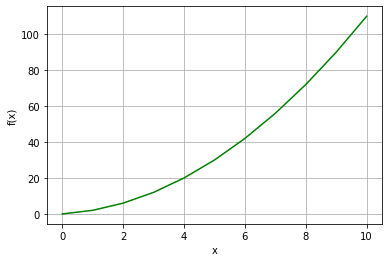

In [50]:
# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

plt.show()

Now, we know that we can calculate the average rate of change for a given interval on the line by calculating the slope for a secant line that connects two points on the line. For example, we can calculate the average change for the interval between x=4 and x=6 by dividing the change (or *delta*, indicated as &Delta;) in the value of *f(x)* by the change in the value of *x*:

\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}

The delta for *f(x)* is calculated by subtracting the *f(x)* values of our points, and the delta for *x* is calculated by subtracting the *x* values of our points; like this:

\begin{equation}m = \frac{f(x)_{2} - f(x)_{1}}{x_{2} - x_{1}} \end{equation}

So for the interval between x=4 and x=6, that's:

\begin{equation}m = \frac{f(6) - f(4)}{6 - 4} \end{equation}

We can calculate and plot this using the following Python:

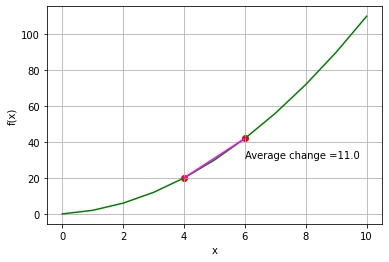

In [51]:
# Set the a values
x1 = 4
x2 = 6

# Get the corresponding f(x) values 
y1 = f(x1)
y2 = f(x2)

# Calculate the slope by dividing the deltas
a = (y2 - y1)/(x2 - x1)

# Create an array of x values for the secant line
sx = [x1,x2]

# Use the function to get the y values
sy = [f(i) for i in sx]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the interval points
plt.scatter([x1,x2],[y1,y2], c='red')

# Plot the secant line
plt.plot(sx,sy, color='magenta')

# Display the calculated average rate of change
plt.annotate('Average change =' + str(a),(x2, (y2+y1)/2))

plt.show()

The average rate of change for the interval between x=4 and x=6 is <sup>11</sup>/<sub>1</sub> (or simply 11), meaning that for every **1** added to *x*, *f(x)* increases by **11**. Put another way, if x represents time in seconds and f(x) represents distance in meters, the average rate of change for distance over time (in other words, *velocity*) for the 4 to 6 second interval is 11 meters-per-second.

So far, this is just basic algebra; but what if instead of the average rate of change over an interval, we want to calculate the rate of change at a single point, say, where x = 4.5?

One approach we could take is to create a secant line between the point at which we want the slope and another point on the function line that is infintesimally close to it. So close in fact that the secant line is actually a tangent that goes through both points. We can then calculate the slope for the secant line as before. This would look something like the graph produced by the following code:

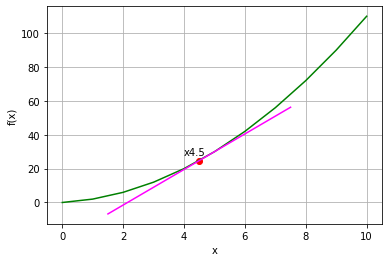

In [52]:
# Set the x1 point, arbitrarily 5
x1 = 4.5
y1 = f(x1)

# Set the x2 point, very close to x1
x2 = 5.000000001
y2 = f(x2)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('x' + str(x1),(x1,y1), xytext=(x1-0.5, y1+3))

# Approximate the tangent slope and plot it
m = (y2-y1)/(x2-x1)
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

### 3.1 Calculating a Derivative
In the Python code above, we created the (almost) tangential secant line by specifying a point that is very close to the point at which we want to calculate the rate of change. This is adequate to show the line conceptually in the graph, but it's not a particularly generalizable (or accurate) way to actually calculate the line so that we can get the rate of change at any given point.

If only we knew of a way to calculate a point on the line that is as close as possible to point with a given *x* value.

Oh wait, we do! It's a *limit*.

So how do we apply a limit in this scenario? Well, let's start by examining our general approach to calculating slope in a little more detail.Our tried and tested approach is to plot a secant line between two points at different values of x, so let's plot an arbitrary (*x,y*) point, and then add an arbitrary amount to *x*, which we'll call *h*. Then we know that we can plot a secant line between (*x,f(x)*) and (*x+h,f(x+h)*) and find its slope.

Run the cell below to see these points:

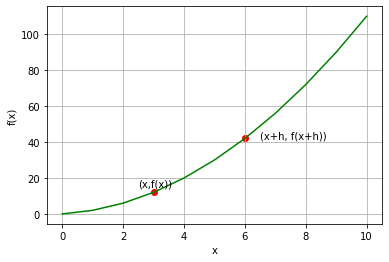

In [53]:
# Set the x point
x1 = 3
y1 = f(x1)

# set the increment
h = 3

# set the x+h point
x2 = x1+h
y2 = f(x2)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the x point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the x+h point
plt.scatter(x2,y2, c='red')
plt.annotate('(x+h, f(x+h))',(x2,y2), xytext=(x2+0.5, y2))

plt.show()

As we saw previously, our formula to calculate slope is:

\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}

The delta for *f(x)* is calculated by subtracting the *f(x + h)* and *f(x)* values of our points, and the delta for *x* is just the difference between *x* and *x + h*; in other words, *h*:

\begin{equation}m = \frac{f(x + h) - f(x)}{h} \end{equation}

What we actually need is the slope at the shortest possible distance between x and x+h, so we're looking for the smallest possible value of *h*. In other words, we need the limit as *h* approaches 0.

\begin{equation}\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

This equation is generalizable, and we can use it as the definition of a function to help us find the slope at any given value of *x* on the line, and it's what we call the *derivative* of our original function (which in this case is called *f*). This is generally indicated in *Lagrange* notation like this:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

You'll also sometimes see derivatives written in *Leibniz's* notation like this:

\begin{equation}\frac{d}{dx}f(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

***Note:*** *Some textbooks use **h** to symbolize the difference between **x<sub>0</sub>** and **x<sub>1</sub>**, while others use **&Delta;x**. It makes no diffrerence which symbolic value you use.*

#### 3.1.1 Alternate Form for a Derivative
The formula above shows the generalized form for a derivative. You can use the derivative function to get the slope at any given point, for example to get the slope at point *a* you could just plug the value for *a* into the generalized derivative function:

\begin{equation}f'(\textbf{a}) = \lim_{h \to 0} \frac{f(\textbf{a} + h) - f(\textbf{a})}{h} \end{equation}

Or you could use the alternate form, which is specific to point *a*:

\begin{equation}f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x - a} \end{equation}

These are mathematically equivalent.

#### 3.1.2 Finding the Derivative for a Specific Point
It's easier to understand differentiation by seeing it in action, so let's use it to find the derivitive for a specific point in the function ***f***.

Here's the definition of function ***f***:

\begin{equation}f(x) = x^{2} + x\end{equation}

Let's say we want to find ***f'(2)*** (the derivative for ***f*** when ***x*** is 2); so we're trying to find the slope at the point shown by the following code:

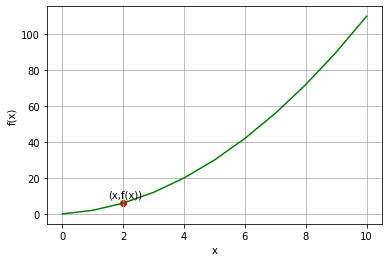

In [54]:
# Set the point
x1 = 2
y1 = f(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

plt.show()

Here's our generalized formula for finding a derivative at a specific point (*a*):

\begin{equation}f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h} \end{equation}

So let's just start by plugging our *a* value in:

\begin{equation}f'(\textbf{2}) = \lim_{h \to 0} \frac{f(\textbf{2} + h) - f(\textbf{2})}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{((2+h)^{2} + 2 + h) - (2^{2} + 2)}{h} \end{equation}

We can apply the distribution property to ***(2 + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - (2^{2} + 2)}{h} \end{equation}

Then we can simplify 2<sup>2</sup> + 2 (2<sup>2</sup> is 4, plus 2 gives is 6):

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - 6}{h} \end{equation}

We can combine like terms on the left side of the numerator to make things a little clearer:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(h^{2} + 5h + 6) - 6}{h} \end{equation}

Which combines even further to get rid of the *6*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{h^{2} + 5h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(2) = \lim_{h \to 0} h + 5 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(2) = 0 + 5 \end{equation}

so:

\begin{equation}f'(2) = 5 \end{equation}

Let's draw a tangent line with that slope on our graph to see if it looks right:

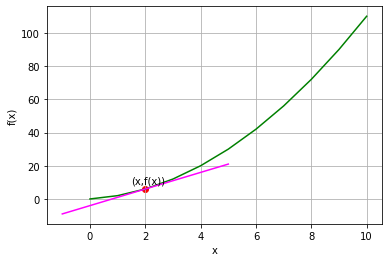

In [55]:
# Set the point
x1 = 2
y1 = f(x1)

# Specify the derivative we calculated above
m = 5

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

#### 3.1.3 Finding a Derivative for Any Point
Now let's put it all together and define a function that we can use to find the derivative for any point in the ***f*** function:

Here's our general derivative function again:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{((x+h)^{2} + x + h) - (x^{2} + x)}{h} \end{equation}

We can apply the distribution property to ***(x + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{(x^{2} + h^{2} + 2xh + x + h) - (x^{2} + x)}{h} \end{equation}

Then we can use the distributive property to expand ***- (x<sup>2</sup> + x)***, which is the same thing as *-1(x<sup>2</sup> + x)*, to ***- x<sup>2</sup> - x***:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{x^{2} + h^{2} + 2xh + x + h - x^{2} - x}{h} \end{equation}

We can combine like terms on the numerator to make things a little clearer:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{h^{2} + 2xh + h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(x) = \lim_{h \to 0} 2x + h + 1 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(x) = 2x + 0 + 1 \end{equation}

so:

\begin{equation}f'(x) = 2x + 1 \end{equation}

Now we have a function for the derivative of ***f***, which we can apply to any *x* value to find the slope of the function at ***f(x***).

For example, let's find the derivative of ***f*** with an *x* value of 5:

\begin{equation}f'(5) = 2\cdot5 + 1 = 10 + 1 = 11\end{equation}

Let's use Python to define the ***f(x)*** and ***f'(x)*** functions, plot ***f(5)*** and show the tangent line for ***f'(5)***:

In [56]:
# Create derivative function for f
def fd(x):
    return (2 * x) + 1

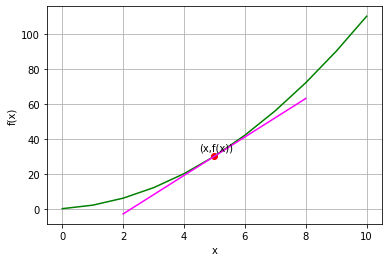

In [57]:
# Set the point
x1 = 5
y1 = f(x1)

# Calculate the derivative using the derivative function
m = fd(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

### 3.2 Differentiability
It's important to realize that a function may not be *differentiable* at every point; that is, you might not be able to calculate the derivative for every point on the function line.

To be differentiable at a given point:
- The function must be *continuous* at that point.
- The tangent line at that point cannot be vertical
- The line must be *smooth* at that point (that is, it cannot take on a sudden change of direction at the point)

For example, consider the following (somewhat bizarre) function:

\begin{equation}
q(x) = \begin{cases}
  \frac{40,000}{x^{2}}, & \text{if } x < -4, \\
  (x^{2} -2) \cdot (x - 1), & \text{if } x \ne 0 \text{ and } x \ge -4 \text{ and } x < 8, \\
  (x^{2} -2), & \text{if } x \ne 0 \text{ and } x \ge 8
\end{cases}
\end{equation}

In [58]:
# Define function q
def q(x):
    if x != 0:
        if x < -4:
            return 40000 / (x**2)
        elif x < 8:
            return (x**2 - 2) * x - 1
        else:
            return (x**2 - 2)

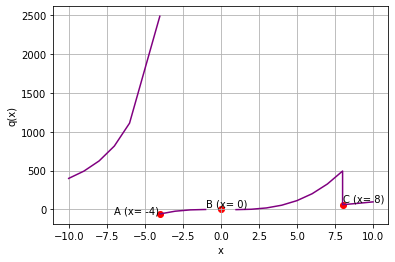

In [59]:
# Create an array of x values
x = list(range(-10, -5))
x.append(-4.01)
x2 = list(range(-4,8))
x2.append(7.9999)
x2 = x2 + list(range(8,11))

# Get the corresponding y values from the function
y = [q(i) for i in x]
y2 = [q(i) for i in x2]

# Set up the graph
plt.xlabel('x')
plt.ylabel('q(x)')
plt.grid()

# Plot x against q(x)
plt.plot(x,y, color='purple')
plt.plot(x2,y2, color='purple')


plt.scatter(-4,q(-4), c='red')
plt.annotate('A (x= -4)',(-5,q(-3.9)), xytext=(-7, q(-3.9)))

plt.scatter(0,0, c='red')
plt.annotate('B (x= 0)',(0,0), xytext=(-1, 40))

plt.scatter(8,q(8), c='red')
plt.annotate('C (x= 8)',(8,q(8)), xytext=(8, 100))

plt.show()

The points marked on this graph are non-differentiable:
- Point **A** is non-continuous - the limit from the negative side is infinity, but the limit from the positive side &approx; -57
- Point **B** is also non-continuous - the function is not defined at x = 0.
- Point **C** is defined and continuous, but the sharp change in direction makes it non-differentiable.

### 3.3 Derivatives of Equations

We've been talking about derivatves of *functions*, but it's important to remember that functions are just named operations that return a value. We can apply what we know about calculating derivatives to any equation, for example:

\begin{equation}\frac{d}{dx}(2x + 6)\end{equation}

Note that we generally switch to *Leibniz's* notation when finding derivatives of equations that are not encapsulated as functions; but the approach for solving this example is exactly the same as if we had a hypothetical function with the definition *2x + 6*:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{(2(x+h) + 6) - (2x + 6)}{h} \end{equation}

After factoring out the* 2(x+h)* on the left and the *-(2x - 6)* on the right, this is:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{2x + 2h + 6 - 2x - 6}{h} \end{equation}

We can simplify this to:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Now we can factor *h* out entirely, so at any point:

\begin{equation}\frac{d}{dx}(2x + 6) = 2 \end{equation}

If you run the Python code below to plot the line created by the equation, you'll see that it does indeed have a constant slope of 2:

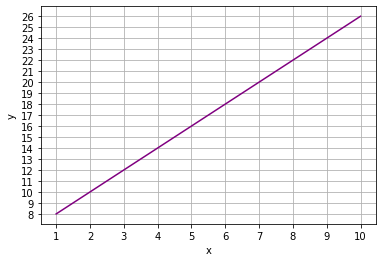

In [60]:
# Create an array of x values from 0 to 10 to plot
x = list(range(1, 11))

# Use the function to get the y values
y = [(2*i) + 6 for i in x]

# Set up the graph
plt.xlabel('x')
plt.xticks(range(1,11, 1))
plt.ylabel('y')
plt.yticks(range(8,27, 1))
plt.grid()

# Plot the function
plt.plot(x,y, color='purple')


plt.show()

### 3.4 Derivative Rules and Operations
When working with derivatives, there are some rules, or shortcuts, that you can apply to make your life easier.

#### 3.4.1 Basic Derivative Rules
Let's start with some basic rules that it's useful to know.

- If *f(x)* = *C* (where *C* is a constant), then *f'(x)* = 0

    This makes sense if you think about it for a second. No matter what value you use for *x*, the function returns the same constant value; so the graph of the function will be a horizontal line. There's no rate of change in a horiziontal line, so its slope is 0 at all points. This is true of any constant, including symbolic constants like *&pi;* (pi).
    
    So, for example:
    
\begin{equation}f(x) = 6 \;\; \therefore \;\; f'(x) = 0 \end{equation}

    Or:

\begin{equation}f(x) = \pi \;\; \therefore \;\; f'(x) = 0 \end{equation}
    
- If *f(x)* = *Cg(x)*, then *f'(x)* = *Cg'(x)*

    This rule tells us that if a function is equal to a second function multiplied by a constant, then the derivative of the first function will be equal to the derivative of the second function multiplied by the same constant. For example:
    
\begin{equation}f(x) = 2g(x) \;\; \therefore \;\; f'(x) = 2g'(x) \end{equation}

- If *f(x)* = *g(x)* + *h(x)*, then *f'(x)* = *g'(x)* + *h'(x)*

    In other words, if a function is the sum of two other functions, then the derivative of the first function is the sum of the derivatives of the other two functions. For example:
    
\begin{equation}f(x) = g(x) + h(x) \;\; \therefore \;\; f'(x) = g'(x) + h'(x) \end{equation}

    Of course, this also applies to subtraction:
    
\begin{equation}f(x) = k(x) - l(x) \;\; \therefore \;\; f'(x) = k'(x) - l'(x) \end{equation}

As discussed previously, functions are just equations encapsulated as a named entity that return a value; and the rules can be applied to any equation. For example:

\begin{equation}\frac{d}{dx}(2x + 6) = \frac{d}{dx} 2x +  \frac{d}{dx} 6\end{equation}

So we can take advantage of the rules to make the calculation a little easier:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2(x+h) - 2x}{h} \end{equation}

After factoring out the* 2(x+h)* on the left, this is:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2x + 2h - 2x}{h} \end{equation}

We can simplify this to:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Which gives us:

\begin{equation}\frac{d}{dx}(2x) = 2 \end{equation}

Now we can turn our attention to the derivative of the constant 6 with respect to *x*, and we know that the derivative of a constant is always 0, so:

\begin{equation}\frac{d}{dx}(6) = 0\end{equation}

We add the two derivatives we calculated:

\begin{equation}\frac{d}{dx}(2x + 6) = 2 + 0\end{equation}

Which gives us our result:

\begin{equation}\frac{d}{dx}(2x + 6) = 2\end{equation}


#### 3.4.2 The Power Rule
The *power rule* is one of the most useful shortcuts in the world of differential calculus. It can be stated like this:

\begin{equation}f(x) = x^{n} \;\; \therefore \;\; f'(x) = nx^{n-1}\end{equation}

So if our function for *x* returns *x* to the power of some constant (which we'll call *n*), then the derivative of the function for *x* is *n* times *x* to the power of *n* - 1.

It's probably helpful to look at a few examples to see how this works:

\begin{equation}f(x) = x^{3} \;\; \therefore \;\; f'(x) = 3x^{2}\end{equation}

\begin{equation}f(x) = x^{-2} \;\; \therefore \;\; f'(x) = -2x^{-3}\end{equation}

\begin{equation}f(x) = x^{2} \;\; \therefore \;\; f'(x) = 2x\end{equation}

In each of these examples, the exponential of *x* in the function definition becomes the coefficient for *x* in the derivative definition, with the exponential is decremented by 1.

Here's a worked example to find the derivative of the following function:

\begin{equation}f(x) = x^{2}\end{equation}

So we start with the general derivative function:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

We can plug in our definition for *f*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{(x + h)^{2} - x^{2}}{h} \end{equation}

Now we can factor out the perfect square binomial on the left:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{x^{2} + h^{2} + 2xh - x^{2}}{h} \end{equation}

The x<sup>2</sup> terms cancel each other out so we get to:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{h^{2} + 2xh}{h} \end{equation}

Which simplifies to:

\begin{equation}f'(x) = \lim_{h \to 0} h + 2x \end{equation}

With *h* approaching 0, this is:

\begin{equation}f'(x) = 0 + 2x \end{equation}

So our answer is:

\begin{equation}f'(x) = 2x \end{equation}

Note that we could have achieved the same result by simply applying the power rule and transforming x<sup>2</sup> to 2x<sup>1</sup> (which is the same as 2x).

#### 3.4.3 The Product Rule
The product rule can be stated as:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) \end{equation}

OK, let's break that down. What it's saying is that the derivative of *f(x)* multiplied by *g(x)* is equal to the derivative of *f(x)* multiplied by the value of *g(x)* added to the value of *f(x)* multiplied by the derivative of *g(x*).

Let's see an example based on the following two functions:

\begin{equation}f(x) = 2x^{2} \end{equation}

\begin{equation}g(x) = x + 1 \end{equation}

Let's start by calculating the derivative of *f(x)*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2(x + h)^{2} - 2x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2x^{2} + 2h^{2} + 4xh - 2x^{2}}{h} \end{equation}

Which when we cancel out the 2x<sup>2</sup> and -2x<sup>2</sup> is:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2h^{2} + 4xh}{h} \end{equation}

Which simplifies to:

\begin{equation}f'(x) = \lim_{h \to 0} 2h + 4x \end{equation}

With *h* approaching 0, this is:

\begin{equation}f'(x) = 4x \end{equation}

Now let's look at *g'(x)*:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{(x + h) + 1 - (x + 1)}{h} \end{equation}

We can just remove the brackets on the left and factor out the *-(x + 1)* on the right:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{x + h + 1 - x - 1}{h} \end{equation}

Which can be cleaned up to:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{h}{h} \end{equation}

Enabling us to factor *h* out completely to give a constant derivative of *1*:

\begin{equation}g'(x) = 1 \end{equation}

So now we can calculate the derivative for the product of these functions by plugging the functions and the derivatives we've calculated for them into the product rule equation:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) \end{equation}

So:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = (4x \cdot (x + 1)) + (2x^{2} \cdot 1) \end{equation}

Which can be simplified to:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = (4x^{2} + 4x) + 2x^{2} \end{equation}

Which can be further simplified to:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = 6x^{2} + 4x \end{equation}

#### 3.4.4 The Quotient Rule
The *quotient rule* applies to functions that are defined as a quotient of one expression divided by another; for example:

\begin{equation}r(x) = \frac{s(x)}{t(x)} \end{equation}

In this situation, you can apply the following quotient rule to find the derivative of *r(x)*:

\begin{equation}r'(x) = \frac{s'(x)t(x) - s(x)t'(x)}{[t(x)]^{2}} \end{equation}

Here are our definitions for *s(x)* and *t(x)*:

\begin{equation}s(x) = 3x^{2} \end{equation}

\begin{equation}t(x) = 2x\end{equation}

Let's start with *s'(x)*:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3(x + h)^{2} - 3x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3x^{2} + 3h^{2} + 6xh - 3x^{2}}{h} \end{equation}

Which when we cancel out the 3x<sup>2</sup> and -3x<sup>2</sup> is:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3h^{2} + 6xh}{h} \end{equation}

Which simplifies to:

\begin{equation}s'(x) = \lim_{h \to 0} 3h + 6x \end{equation}

With *h* approaching 0, this is:

\begin{equation}s'(x) = 6x \end{equation}

Now let's look at *t'(x)*:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2(x + h) - 2x}{h} \end{equation}

We can just factor out the *2(x + h)* on the left:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2x + 2h - 2x}{h} \end{equation}

Which can be cleaned up to:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Enabling us to factor *h* out completely to give a constant derivative of *2*:

\begin{equation}t'(x) = 2 \end{equation}

So now we can calculate the derivative for the quotient of these functions by plugging the function definitions and the derivatives we've calculated for them into the quotient rule equation:

\begin{equation}r'(x) = \frac{(6x \cdot 2x) - (3x^{2} \cdot 2)}{[2x]^{2}} \end{equation}

We can factor out the numerator terms like this:

\begin{equation}r'(x) = \frac{12x^{2} - 6x^{2}}{[2x]^{2}} \end{equation}

Which can then be combined:

\begin{equation}r'(x) = \frac{6x^{2}}{[2x]^{2}} \end{equation}

The denominator is [2x]<sup>2</sup> (note that this is different from 2x<sup>2</sup>. [2x]<sup>2</sup> is 2x &bull; 2x, whereas  2x<sup>2</sup> is 2 &bull; x<sup>2</sup>):

\begin{equation}r'(x) = \frac{6x^{2}}{4x^{2}} \end{equation}

Which simplifies to:

\begin{equation}r'(x) = 1\frac{1}{2} \end{equation}

So the derivative of *r(x)* is 1.5.

#### 3.4.5 The Chain Rule

The *chain rule* takes advantage of the fact that equations can be encapsulated as functions, and since functions contain equations, it's possible to nest one function within another.

For example, consider the following function:

\begin{equation}u(x) = 2x^{2} \end{equation}

We could view the definition of *u(x)* as a composite of two functions,; an *inner* function that calculates x<sup>2</sup>, and an *outer* function that multiplies the result of the inner function by 2.

\begin{equation}u(x) = \widehat{\color{blue}2\color{blue}(\underline{\color{red}x^{\color{red}2}}\color{blue})} \end{equation}

To make things simpler, we can name these inner and outer functions:

\begin{equation}i(x) = x^{2} \end{equation}

\begin{equation}o(x) = 2x \end{equation}

Note that *x* indicates the input for each function. Function *i* takes its input and squares it, and function *o* takes its input and multiplies it by 2. When we use these as a composite function, the *x* value input into the outer function will be the output from the inner function.

Let's take a look at how we can apply these functions to get back to our original *u* function:

\begin{equation}u(x) = o(i(x)) \end{equation}

So first we need to find the output of the inner *i* function so we can use at as the input value for the outer *o* function. Well, that's easy, we know the definition of *i* (square the input), so we can just plug it in:

\begin{equation}u(x) = o(x^{2}) \end{equation}

We also know the definition for the outer *o* function (multiply the input by 2), so we can just apply that to the input:

\begin{equation}u(x) = 2x^{2} \end{equation}

OK, so now we know how to form a composite function. The *chain rule* can be stated like this:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x)\end{equation}

Alright, let's start by plugging the output of the inner *i(x)* function in:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(x^{2}) \cdot i'(x)\end{equation}

Now let's use that to calculate the derivative of *o*, replacing each *x* in the equation with the output from the *i* function (*x<sup>2</sup>*):

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2(x^{2} + h) - 2x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2x^{2} + 2h - 2x^{2}}{h} \end{equation}

Which when we cancel out the 2x<sup>2</sup> and -2x<sup>2</sup> is:

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Which simplifies to:

\begin{equation}o'(x) = 2 \end{equation}

Now we can calculate *i'(x)*. We know that the definition of *i(x)* is x<sup>2</sup>, and we can use the power rule to determine that *i'(x)* is therefore 2x.

So our equation at this point is:

\begin{equation}\frac{d}{dx}[o(i(x))] = 2 \cdot 2x\end{equation}

Which is:

\begin{equation}\frac{d}{dx}[o(i(x))] = 4x\end{equation}

Commonly, the chain rule is stated using a slighly different notation that you may find easier to work with. In this case, we can take our equation:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x)\end{equation}

and rewrite it as 

\begin{equation}\frac{du}{dx} = \frac{do}{di}\frac{di}{dx}\end{equation}

We can then complete the calculations like this:

\begin{equation}\frac{du}{dx} = 2 \cdot 2x = 4x\end{equation}

## 4 Critical Points and Optimization
We've explored various techniques that we can use to calculate the derivative of a function at a specific *x* value; in other words, we can determine the *slope* of the line created by the function at any point on the line.

This ability to calculate the slope means that we can use derivatives to determine some interesting properties of the function.

### 4.1 Function Direction at a Point
Consider the following function, which represents the trajectory of a ball that has been kicked on a football field:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

Run the Python code below to graph this function and see the trajectory of the ball over a period of 10 seconds.

In [61]:
# Create function k
def k(x):
    return -10*(x**2) + (100*x)  + 3

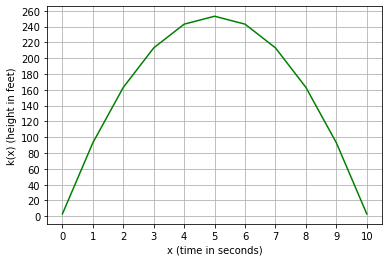

In [62]:
# Create an array of x values to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [k(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(0,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

plt.show()

By looking at the graph of this function, you can see that it describes a parabola in which the ball rose in height before falling back to the ground. On the graph, it's fairly easy to see when the ball was rising and when it was falling.

Of course, we can also use  derivative to determine the slope of the function at any point. We can apply some of the rules we've discussed previously to determine the derivative function:

- We can add together the derivatives of the individual terms (***-10x<sup>2</sup>***, ***100x***, and ***3***) to find the derivative of the entire function.
- The *power* rule tells us that the derivative of ***-10x<sup>2</sup>*** is ***-10 &bull; 2x***, which is ***-20x***.
- The *power* rule also tells us that the derivative of ***100x*** is ***100***.
- The derivative of any constant, such as ***3*** is ***0***.

So:

\begin{equation}k'(x) = -20x + 100 + 0 \end{equation}

Which of course simplifies to:

\begin{equation}k'(x) = -20x + 100 \end{equation}

Now we can use this derivative function to find the slope for any value of ***x***.

Run the cell below to see a graph of the function and its derivative function:

In [63]:
def kd(x):
    return -20*x + 100

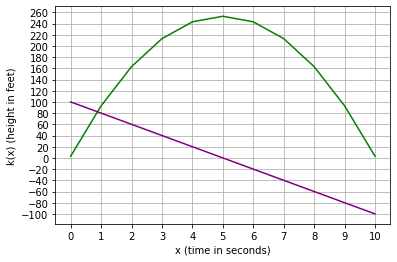

In [64]:
# Use the derivative function to get the derivative values
yd = [kd(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(0,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

plt.show()

Look closely at the purple line representing the derivative function, and note that it is a constant  decreasing value - in other words, the slope of the function is reducing linearly as x increases. Even though the function value itself is increasing for the first half of the parabola (while the ball is rising), the slope is becoming less steep (the ball is not rising at such a high rate), until finally the ball reaches its apogee and the slope becomes negative (the ball begins falling).

Note also that the point where the derivative line crosses 0 on the y-axis is also the point where the function value stops increasing and starts decreasing. When the slope has a positive value, the function is increasing; and when the slope has a negative value, the function is decreasing.

The fact that the derivative line crosses 0 at the highest point of the function makes sense if you think about it logically. If you were to draw the tangent line representing the slope at each point, it would be rotating clockwise throughout the graph, initially pointing up and to the right as the ball rises, and turning until it is pointing down and right as the ball falls. At the highest point, the tangent line would be perfectly horizontal, representing a slope of 0.

Run the following code to visualize this:

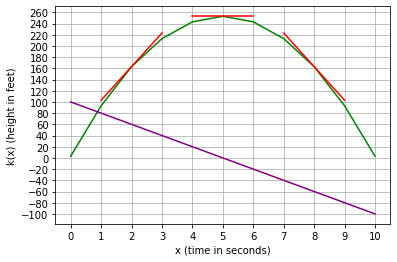

In [65]:
# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(0,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

# Plot tangent slopes for x = 2, 5, and 8
x1 = 2
x2 = 5
x3 = 8
plt.plot([x1-1,x1+1],[k(x1)-(kd(x1)),k(x1)+(kd(x1))], color='red')
plt.plot([x2-1,x2+1],[k(x2)-(kd(x2)),k(x2)+(kd(x2))], color='red')
plt.plot([x3-1,x3+1],[k(x3)-(kd(x3)),k(x3)+(kd(x3))], color='red')

plt.show()

Now consider the following function, which represents the number of flowers growing in a flower bed before and after the spraying of a fertilizer:

\begin{equation}w(x) = x^{2} + 2x + 7 \end{equation}

In [66]:
# Create function w
def w(x):
    return (x**2) + (2*x) + 7

In [67]:
def wd(x):
    return 2*x + 2

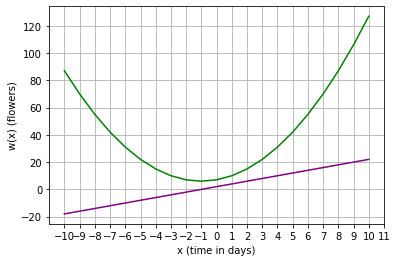

In [68]:
# Create an array of x values to plot
x = list(range(-10, 11))

# Use the function to get the y values
y = [w(i) for i in x]

# Use the derivative function to get the derivative values
yd = [wd(i) for i in x]

# Set up the graph
plt.xlabel('x (time in days)')
plt.ylabel('w(x) (flowers)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

plt.show()

Note that the green line represents the function, showing the number of flowers for 10 days before and after the fertilizer treatment. Before treatment, the number of flowers was in decline, and after treatment the flower bed started to recover.

The derivative function is shown in purple, and once again shows a linear change in slope. This time, the slope is increasing at a constant rate; and once again, the derivative function line crosses 0 at the lowest point in the function line (in other words, the slope changed from negative to positive when the flowers started to recover).

### 4.2 Critical Points
From what we've seen so far, it seems that there is a relationship between a function reaching an extreme value (a maximum or a minimum), and a derivative value of 0. This makes intuitive sense; the derivative represents the slope of the line, so when a function changes from a negative slope to a positive slope, or vice-versa, the derivative must pass through 0.

However, you need to be careful not to assume that just because the derivative is 0 at a given point, that this point represents the minimum or maximum of the function. For example, consider the following function:

\begin{equation}v(x) = x^{3} - 2x + 100 \end{equation}

Run the following Python code to visualize this function and its corresponding derivative function:

In [69]:
# Create function v
def v(x):
    return (x**3) - (2*x) + 100

In [70]:
def vd(x):
    return 3*(x**2) - 2

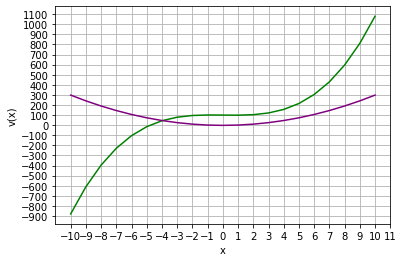

In [71]:
# Create an array of x values to plot
x = list(range(-10, 11))

# Use the function to get the y values
y = [v(i) for i in x]

# Use the derivative function to get the derivative values
yd = [vd(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('v(x)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-1000, 2000, 100))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

plt.show()

Note that in this case, the purple derivative function line passes through 0 as the green function line transitions from a *concave downwards* slope (a slope that is decreasing) to a *concave upwards* slope (a slope that is increasing). The slope flattens out to 0, forming a "saddle" before the it starts increasing.

What we can learn from this is that interesting things seem to happen to the function when the derivative is 0. We call points where the derivative crosses 0 *critical points*, because they indicate that the function is changing direction. When a function changes direction from positive to negative, it forms a peak (or a *local maximum*), when the function changes direction from negative to positive it forms a trough (or *local minimum*), and when it maintains the same overall direction but changes the concavity of the slope it creates an *inflexion point*.

### 4.3 Finding Minima and Maxima
A common use of calculus is to find minimum and maximum points in a function. For example, we might want to find out how many seconds it took for the kicked football to reach its maximum height, or how long it took for our fertilizer to be effective in reversing the decline of flower growth.

We've seen that when a function changes direction to create a maximum peak or a minimum trough, the derivative of the function is 0, so a step towards finding these extreme points might be to simply find all of the points in the function where the derivative is 0. For example, here's our function for the kicked football:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

From this, we've calculated the function for the derivative as:

\begin{equation}k'(x) = -20x + 100 \end{equation}

We can then solve the derivative equation for an f'(x) value of 0:

\begin{equation}-20x + 100 = 0 \end{equation}

We can remove the constant by subtracting 100 to both sides:

\begin{equation}-20x = -100 \end{equation}

Multiplying both sides by -1 gets rid of the negative values (this isn't strictly necessary, but makes the equation a little less confusing)

\begin{equation}20x = 100 \end{equation}

So:

\begin{equation}x = 5 \end{equation}

So we know that the derivative will be 0 when *x* is 5, but is this a minimum, a maximum, or neither? It could just be an inflexion point, or the entire function could be a constant value with a slope of 0) Without looking at the graph, it's difficult to tell.

### 4.4 Second Order Derivatives
The solution to our problem is to find the derivative of the derivative! Until now, we've found the derivative of a function, and indicated it as ***f'(x)***. Technically, this is known as the *prime* derivative; and it describes the slope of the function. Since the derivative function is itself a function, we can find its derivative, which we call the *second order* (or sometimes just *second*) derivative. This is indicated like this: ***f''(x)***.

So, here's our function for the kicked football:

\begin{equation}k(x) = -10x^{2} + 100x + 3 \end{equation}

Here's the function for the prime derivative:

\begin{equation}k'(x) = -20x + 100 \end{equation}

And using a combination of the power rule and the constant rule, here's the function for the second derivative:

\begin{equation}k''(x) = -20 \end{equation}

Now, without even drawing the graph, we can see that the second derivative has a constant value; so we know that the slope of the prime derivative is linear; and because it's a negative value, we know that it is decreasing. So when the prime derivative crosses 0, it we know that the slope of the function is decreasing linearly; so the point at *x=0* must be a maximum point.

Run the following code to plot the function, the prime derivative, and the second derivative for the kicked ball:

In [72]:
# Create function k
def k(x):
    return -10*(x**2) + (100*x)  + 3

In [73]:
def kd(x):
    return -20*x + 100

In [74]:
def k2d(x):
    return -20

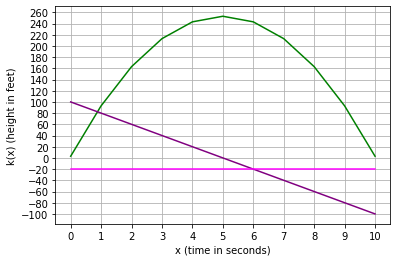

In [75]:
# Create an array of x values to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [k(i) for i in x]

# Use the derivative function to get the k'(x) values
yd = [kd(i) for i in x]

# Use the 2-derivative function to get the k''(x)
y2d = [k2d(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(0,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot  k'(x)
plt.plot(x,yd, color='purple')

# Plot k''(x)
plt.plot(x,y2d, color='magenta')

plt.show()

Let's take the same approach for the flower bed problem. Here's the function:

\begin{equation}w(x) = x^{2} + 2x + 7 \end{equation}

Using the power rule and constant rule, gives us the prime derivative function:

\begin{equation}w'(x) = 2x + 2 \end{equation}

Applying the power rule and constant rule to the prime derivative function gives us the second derivative function:

\begin{equation}w''(x) = 2 \end{equation}

Note that this time, the second derivative is a positive constant, so the prime derivative (which is the slope of the function) is increasing linearly. The point where the prime derivative crosses 0 must therefore be a minimum. Let's run the code below to check:

In [76]:
# Create function w
def w(x):
    return (x**2) + (2*x) + 7

In [77]:
def wd(x):
    return 2*x + 2

In [78]:
def w2d(x):
    return 2

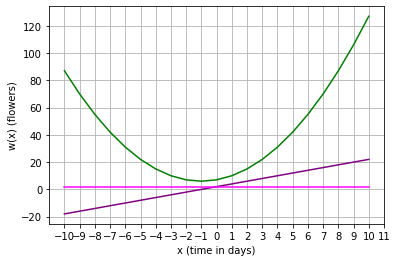

In [79]:
# Create an array of x values to plot
x = list(range(-10, 11))

# Use the function to get the y values
y = [w(i) for i in x]

# Use the derivative function to get the w'(x) values
yd = [wd(i) for i in x]

# Use the 2-derivative function to get the w''(x) values
y2d = [w2d(i) for i in x]

# Set up the graph
plt.xlabel('x (time in days)')
plt.ylabel('w(x) (flowers)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot w'(x)
plt.plot(x,yd, color='purple')

# Plot w''(x)
plt.plot(x,y2d, color='magenta')

plt.show()

### 4.5 Critical Points that are *Not* Maxima or Minima
Of course, it's possible for a function to form a "saddle" where the prime derivative is zero at a point that is not a minimum or maximum. Here's an example of a function like this:
 
\begin{equation}v(x) = x^{3} - 6x^{2} + 12x + 2 \end{equation}

And here's its prime derivative:
 
\begin{equation}v'(x) = 3x^{2} - 12x + 12 \end{equation}
 
Let's find a critical point where v'(x) = 0
 
\begin{equation}3x^{2} - 12x + 12 = 0 \end{equation}

Factor the x-terms
 
\begin{equation}3x(x - 4) = 12 \end{equation}

Divide both sides by 3:

\begin{equation}x(x - 4) = 4 \end{equation}

Factor the x terms back again

\begin{equation}x^{2} - 4x = 4 \end{equation}

Complete the square, step 1

\begin{equation}x^{2} - 4x + 4 = 0 \end{equation}

Complete the square, step 2

\begin{equation}(x - 2)^{2} = 0 \end{equation}

Find the square root:

\begin{equation}x - 2 = \pm\sqrt{0}\end{equation}

\begin{equation}x - 2 = +\sqrt{0} = 0, -\sqrt{0} = 0\end{equation}

v'(2) = 0 (only touches 0 once)

Is it a maximum or minimum? Let's find the second derivative:

\begin{equation}v''(x) = 6x - 12\end{equation}

So

\begin{equation}v''(2) = 0\end{equation}

So it's neither negative or positive, so it's not a maximum or minimum.

In [80]:
# Create function v
def v(x):
    return (x**3) - (6*(x**2)) + (12*x) + 2

In [81]:
def vd(x):
    return (3*(x**2)) - (12*x) + 12

In [82]:
def v2d(x):
    return (3*(2*x)) - 12

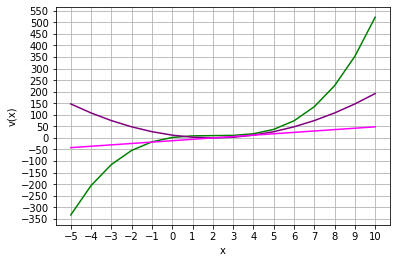

v(2) = 10
v'(2) = 0
v''(2) = 0


In [83]:
# Create an array of x values to plot
x = list(range(-5, 11))

# Use the function to get the y values
y = [v(i) for i in x]

# Use the derivative function to get the derivative values
yd = [vd(i) for i in x]

# Use the derivative function to get the derivative values
y2d = [v2d(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('v(x)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-2000, 2000, 50))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

# Plot the derivative
plt.plot(x,y2d, color='magenta')

plt.show()

print ("v(2) = " + str(v(2)))

print ("v'(2) = " + str(vd(2)))

print ("v''(2) = " + str(v2d(2)))

### 4.6 Optimization
The ability to use derivatives to find minima and maxima of a function makes it a useful tool for scenarios where you need to optimize a function for a specific variable.

#### 4.6.1 Defining Functions to be Optimized
For example, suppose you have decided to build an online video service that is based on a subscription model. You plan to charge a monthly subscription fee, and you want to make the most revenue possible. The problem is that customers are price-sensitive, so if you set the monthly fee too high, you'll deter some customers from signing up. Conversely, if you set the fee too low, you may get more customers, but at the cost of reduced revenue.

What you need is some kind of function that will tell you how many subscriptions you might expect to get based on a given fee. So you've done some research, and found a formula to indicate that the expected subscription volume (in thousands) can be calculated as 5-times the monthly fee subtracted from 100; or expressed as a function:

\begin{equation}s(x) = -5x + 100\end{equation}

What you actually want to optimize is monthly revenue, which is simply the number of subscribers multiplied by the fee:

\begin{equation}r(x) = s(x) \cdot x\end{equation}

We can combine ***s(x)*** into ***r(x)*** like this:

\begin{equation}r(x) = -5x^{2} + 100x\end{equation}

#### 4.6.2 Finding the Prime Derivative
The function ***r(x)*** will return the expected monthly revenue (in thousands) for any proposed fee (*x*). What we need to do now is to find the fee that yields the maximum revenue. Fortunately, we can use a derivative to do that.

First, we need to determine the prime derivative of ***r(x)***, and we can do that easily using the power rule:

\begin{equation}r'(x) = 2 \cdot -5x + 100\end{equation}

Which is:

\begin{equation}r'(x) = -10x + 100\end{equation}

#### 4.6.3 Find Critical Points
Now we need to find any critical points where the derivative is 0, as this could indicate a maximum:

\begin{equation}-10x + 100 = 0\end{equation}

Let's isolate the *x* term:

\begin{equation}-10x = -100\end{equation}

Both sides are negative, so we can mulitply both by -1 to make them positive without affecting the equation:

\begin{equation}10x = 100\end{equation}

Now we can divide both sides by 10 to isolate *x*:

\begin{equation}x = \frac{100}{10}\end{equation}

So:

\begin{equation}x = 10\end{equation}

##### 4.6.3.1 Check for a Maximum
We now know that with an *x* value of of **10**, the derivative is 0; or put another way, when the fee is 10, the slope indicating the change in subscription volume is flat. This could potentially be a point where the change in subscription volume has peaked (in other words, a maximum); but it could also be a minimum or just an inflexion point where the rate of change transitions from negative to positive.

To be sure, we can check the second order derivative. We can calculate this by applying the power rule to the prime derivative:

\begin{equation}r''(x) = -10\end{equation}

Note that the second derivative is a constant with a negative value. It will be the same for any point, including our critical point at *x=10*:

\begin{equation}r''(10) = -10\end{equation}

A negative value for the second derivative tells us that the derivative slope is moving in a negative direction at the point where it is 0, so the function value must be at a maximum.

In other words, the optimal monthly fee for our online video service is 10 - this will generate the maximum monthly revenue.

Run the code below to show the function ***r(x)*** as a graph, and verify that the maximum point is at x = 10.

In [84]:
# Create function s
def s(x):
    return (-5*x) + 100

In [85]:
# Create function r
def r(x):
    return s(x) * x

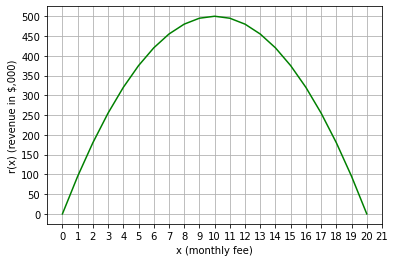

In [86]:
# Create an array of x values to plot
x = list(range(0, 21))

# Use the function to get the y values
y = [r(i) for i in x]

# Set up the graph
plt.xlabel('x (monthly fee)')
plt.ylabel('r(x) (revenue in $,000)')
plt.xticks(range(0,22, 1))
plt.yticks(range(0, 600, 50))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

plt.show()

## 5 Partial Derivatives
Until now, we've considered derivatives of functions that operate on a single variable. How do we take the derivatives of a function like the following?

$$f(x,y) = x^2 + y^2$$

We can take a derivative of the changes in the function with respect to either x or y. We call these derivatives with respect to one variable partial derivatives. Let's give this a try by taking the derivative of $f(x,y)$ with respect to ***x***. We write this partial derivative as follows.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Just as ordinary derivatives give us a way to compute the rate of change of a function, partial derivatives give us a way to compute the rate of change of a function of many variables with respect to one of those variables.

Since $f(x,y)$ is the sum of several simpler functions we need to take the partial derivative of each of these and sum the result. The first two parts are easy.

$$\frac{\partial x^2}{\partial x} = 2x$$

Notice that we are following the usual rules of differentiation for any function of ***x*** here. 

Now we need to take the partial derivative of the last part of $f(x,y)$, which does not depend on ***x*** at all. In these care we get the following.

$$\frac{\partial y^2}{\partial x} = 0$$

Now we can add up the parts to get the complete partail derivative of $f(x,y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$

We can also take the partial derivative of $f(x,y)$ with respect to ***y***. The process proceeds in the following manner.

$$\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$$

### 5.1 Computing a Gradient

At this point, you may well ask what is the point of computing partial derivatives? Yes, they are a nifty math trick, but what are they good for? It turns out that partial derivatives are important if you want to find the analog of the slope for multi-dimensonal surfaces. We call this quantity the **gradient**. 

Recall that you can find minimum and maximum of curves using derivatives. In the same way, you can find the minimum and maximum of surfaces by following the gradiennt and finding the points were the gradient is zero in all directions. 

You have already examined the partial derivatives of the function, $f(x,y) = x^2 + y^2$. These partial derivatives are:

$$\frac{\partial f(x,y)}{\partial x} = 2x \\
\frac{\partial f(x,y)}{\partial y} = 2y$$

In this case, the gradient is a 2-dimensional vector of the change of the function in the $x$ direction and the change in the function in the $y$ direction. This vector can be written as follows:

$$grad(f(x,y)) =  \vec{g(x,y)} = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{bmatrix} = \begin{bmatrix}2x \\ 2y \end{bmatrix} $$

### 5.2 Plotting the Gradient

A plot will help you get feel for the meaning of the gradient. The code below plots the gradient of the function $f(x,y) = x^2 + y^2$ along with contours of the value of the function. Run this code and examine the plot.  

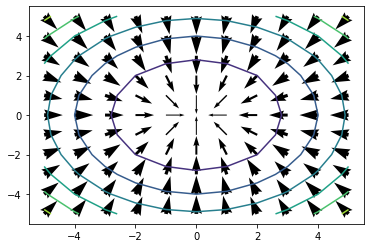

In [87]:
import math

## Create a uniform grid
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

## flatten the gird to 1-d and compute the value of the function z
x_coord = []
y_coord = []
z = []
for i in range(11):  
    for j in range(11):
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))       
        z.append(nx[i,j]**2 + ny[i,j]**2)

## perform vector arithmetic to get the x and y gradients        
x_grad = [-2 * x for x in x_coord]
y_grad = [-2 * y for y in y_coord] 

## Plot the arrows using  width for gradient
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: ## Avoid the zero divide when scaling the arrow
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

## Plot the countours of the function surface
z = np.array(z).reshape(11,11)    
plt.contour(el, el, z)    

Notice the following properties of this plot. 
- The arrows in the plot point in the direction of the gradient.
- The width of the arrows is proportional to the value of the gradient. The width of the arrows and the **gradient decreases as function gets closer to the minimum**. If this is the case everywhere, you can say that a function is **convex**. It is always much easier to find minimum of convex functions.  
- The **direction of the gradient is always perpendicular to the contours**. This is an important property of multivariate functions. 

### 5.3 Using the gradient

So, what is all this good for? Say that you want to find the minimum of the function $f(x,y) = x^2 + y^2$. It is easy to see that the minimum of this function is at $x = 0$ and $y = 0$. But, what if you did not know this solution? Then you could do the following:

1. Take some starting guess.
2. Compute the  gradient.
3. take a small step in the direction of the gradient.
4. Determine if the gradient is close to zero. If so, then stop, since the gradient will be zero at the minimum.
5. Repeate steps 2, 3 and 4. 

The algorithm outlined above is called the **gradient decent method**. It is the basis of many real-world minimization algorithms. 

## 6 Integration

### 6.1 Introduction to Integration

Integrals are the inverses of derivatives. More importantly, using integration provides a way to compute the area under the curve of most any function. There are many applications for integration. For example, if you need to compute a probability of some occurance between limits (which we'll discuss later in this course), then you will use an integral.

Let's start with a simple function:

$$f(x)=x$$

We can plot this function as a line. Run the code below to plot the function for the range 0 to 10:

In [88]:
# Define function f
def f(x):
    return x

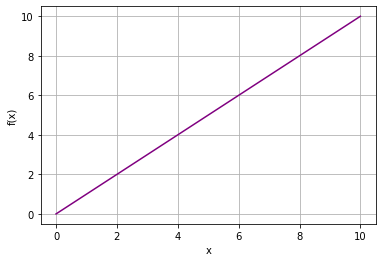

In [89]:

# Create an array of x values from 0 to 10
x = range(0, 11)

# Get the corresponding y values from the function
y = [f(a) for a in x]

# Set up the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against f(x)
plt.plot(x,y, color='purple')

plt.show()

### 6.2 Performing Integration

The *integral* of a function is the area under it - in this case, the area under the purple diagonal line down to the x-axis.

So how do you find the integral of a function? well, for our simple function $f(x) = x$, the formula for an integral is written as follows:

$$\int f(x)\;dx$$

The $\int$ symbol shows that this formula is an integral. The $dx$ indicates that the integration is with respect to the $x$ variable. Note that since $f(x) = x$, we could also write this integral formula as $\int x\;dx$

So, what  is the integral of $x\ dx$? To answer this question, we need the *antiderivative* of ***f*** - in other words we need to find a function which has a derivative matching the output of $f$, which is just $x$. Using the power rule in reverse, a function that has the derivative $x$ would be $\frac{1}{2} x^2$

So, the *unbound* integral formula for $f$ with respect to $x$ can be written as:

$$\int f(x)\;dx = \frac{1}{2} x^2$$

### 6.3 Integration between Limits

Now that we have the unbound integral formula, we can use it to find the integral between specific start and end points. Let's suppose we want to find the area under the function between the $x$ values 0 and 2. In other words, the *integral* of $f$ for the range 0 to 2 with respect to $x$.

Run the following code to re-plot the function and show the area we're interested in:

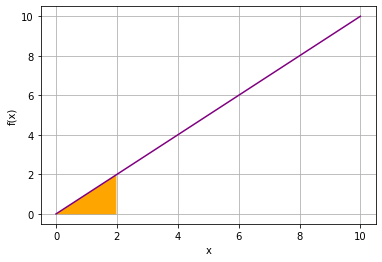

In [90]:
# Set up the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against f(x)
plt.plot(x,y, color='purple')

# show area for integral
section = np.arange(0, 2, 1/20)
plt.fill_between(section,f(section), color='orange')

plt.show()

We call the start and end point the **limits** of the integral. The lower limit is placed as a subscript of the integral sign. The upper limit is placed as a superscript of the integral sign. Using this notation the integral of $f(x)$ from $0$ to $2$ is written as follows:

$$\int_0^2 f(x)\;dx$$

The integral is evaluated by subtracting the value of the integrand at the lower limit from the integrand at the upper limit; and since we know the formula based on our antiderivative function, the integral can be evaluated in the following manner.

$$\int_0^2 f(x)\;dx\\ = \frac{1}{2} x^2\ \big|_0^2\\
= \frac{1}{2} 2^2 - \frac{1}{2} 0^2\\
= \frac{4}{2} - \frac{0}{2} x^2\\ = 2$$

Execute the code in the cell below and verify that the result returned by the ***scipy.integrate.quad*** function in Python is approximately the same as we computed analytically. 

In [91]:
import scipy.integrate as integrate
i, e = integrate.quad(lambda x: f(x), 0, 2)
print (i)

2.0


### 6.4 Another Integral

Here is another example for a slightly more complex function. What is the area under the curve of the function $3x^2 + 2x + 1$ between $0$ and $3$?

let's look at that function and the area in question:

In [92]:
# Define function g
def g(x):
    return 3 * x**2 + 2 * x + 1

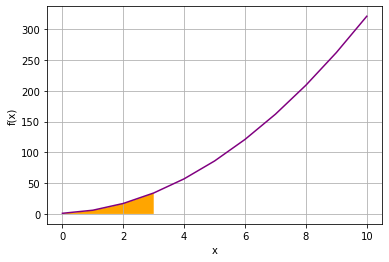

In [93]:
from matplotlib.patches import Polygon

# Create an array of x values from 0 to 10
x = range(0, 11)

# Get the corresponding y values from the function
y = [g(a) for a in x]

# Set up the plot
fig, ax = plt.subplots()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against g(x)
plt.plot(x,y, color='purple')

# Make the shaded region
ix = np.linspace(0, 3)
iy = g(ix)
verts = [(0, 0)] + list(zip(ix, iy)) + [(3, 0)]
poly = Polygon(verts, facecolor='orange')
ax.add_patch(poly)

plt.show()

We can evaluate this integral just as before, this time using function:

$$\int_0^3 3x^2 + 2x + 1\;dx$$ 

We can calculate the antiderivative of $3x^2 + 2x + 1\;dx$ as $\frac{3}{3} x^3 + \frac{2}{2} x^2 + x$, so:

$$\int_0^3= \frac{3}{3} x^3 + \frac{2}{2} x^2 + x\ \big|_0^3\\
= \frac{3}{3} 3^3 + \frac{2}{2} 3^2 + 3 - \frac{3}{3} 0^3 - \frac{2}{2} 0^2 + 0\\
= 27 + 9 + 3 + 0 + 0 + 0\\
= 39$$

Now, execute the code in the cell below to verify the result:

In [94]:
i, e = integrate.quad(lambda x: 3 * x**2 + 2 * x + 1, 0, 3)
print(i)

38.99999999999999


Note that the result from the ***scipy.integrate.quad*** function is approximate - the function actually returns an estimated integral (*i* in this case) and also a measure of absolute error (*e*). Run the following code to see what the absolute error was in this case:

In [95]:
print(e)

4.3298697960381095e-13


The absolute error in this case is extremely small (around $4.3 \times 10^{-13}$).

### 6.5 Infinite limits

In many cases the limits of an integral can be $+/- \infty$. Perhaps suprisingly, this situation is not really a problem if the function being integrated converges to $0$ at the infinite limit. 

Here is an example. The function $e^{-5x} \rightarrow 0$ as $x \rightarrow \infty$. Therefore, the integral of this function from some limit to $\infty$. This integral can be written as follows:

$$\int^{\infty}_0 e^{-5x} dx$$

The code in the cell below computes this integral numerically.

In [96]:
i, e = integrate.quad(lambda x: np.exp(-x*5), 0, np.inf)

print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))

Integral: 0.20000000000000004
Absolute Error: 1.5606666951908062e-11


This integral converges to a small number with a much smaller error estimate. 

Here is another example that illustrates why having infinite integration limits is so useful. When computing probabilities it is often necessary to have infinite limits. Don't worry too much about the details of probability theory. This is covered in a later lesson. 

A Normal distribution with zero mean and a standard deviation of $1$ has the following density function:

$$\frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}}$$

It makes sense that the integral of this probability density function from $-\infty$ to $\infty$ must be $1.0$. In other words the probability of a Normally distributed event ocurring at all possible values must be $1.0$. 

The code in the cell below computes the following integral:

$$\int_{-\infty}^{\infty} \frac{1}{2 \pi} e^{\frac{-x^2}{\sqrt(2 \pi)}} dx$$

Execute this code and verify that the result is approximately $1.0$.

In [97]:
norms = lambda x: np.exp(-x**2/2.0)/np.sqrt(2.0 * 3.14159)
i, e = integrate.quad(norms, -np.inf, np.inf)

print('Integral: ' + str(i))
print('Absolute Error: ' + str(e))

Integral: 1.0000004223321999
Absolute Error: 1.017819568483304e-08
